First I've uploaded all the required basic libraries for data manipulation,numeric and static libraries like pandas,numpy,scipy and data visulaization tool like seaborn and matplotlib

In [1]:
import numpy as np
import pandas as pd
import scipy.stats 
from scipy.stats import zscore,boxcox
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [219]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


##### Now,I've uploaded the CSV file of Loan Application Status Prediction and made a dataframe for the same.

In this dataset I've to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. Since 'Loan_Status' is in the form of categorical String format so will use classification model

### Exploratory Data Analysis(EDA)

In [3]:
#It shows top 5 Rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#It shows bottom 5 Rows
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
#It shows any 1 random Rows
df.sample()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
315,LP002031,Male,Yes,1,Not Graduate,No,3399,1640.0,111.0,180.0,1.0,Urban,Y


In [6]:
print('The Shape is',df.shape)
print('Total Rows are',df.shape[0])
print('Total Columns are',df.shape[1])

The Shape is (614, 13)
Total Rows are 614
Total Columns are 13


As,we can see that there are 614 rows and 13 columns including the Target Variables- 'Loan_Status'.In this project I've to train the model so that I can simply predict whether a person is eligible for loan or not.

In [7]:
#two dimensional dataframe
df.ndim

2

In [8]:
#Total datapoints in this dataframe
df.size

7982

In [9]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### Categorical attributes=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

Categorical columns=8

#### Numeric attributes=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

Numeric columns= 5

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
df.isnull().any().any()

True

In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
df.isnull().sum().sum()

149

There are total 149 null values are present across the columns all together

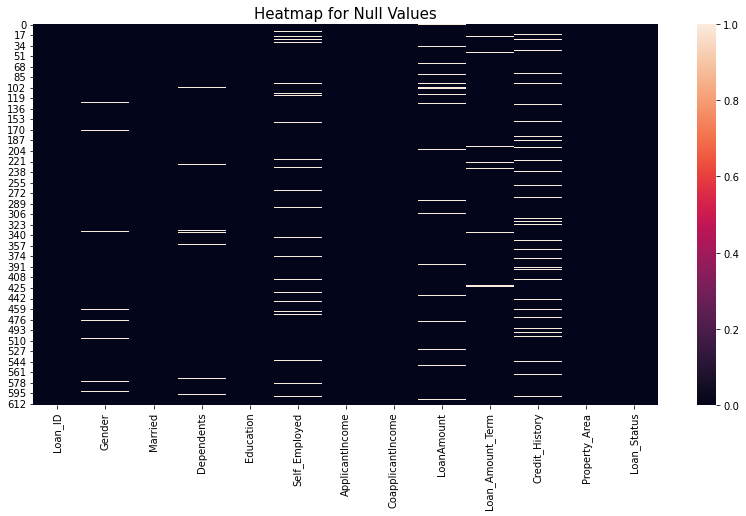

In [16]:
plt.figure(figsize=(14,7))
sns.heatmap(df.isnull())
plt.title('Heatmap for Null Values',fontsize=15)
plt.show()

Above heatmap shows all the columns containing the null values.

In [17]:
#columns of the dataframes are-
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [18]:
#indexes are-
df.index

RangeIndex(start=0, stop=614, step=1)

In [19]:
#will check the uniqueness of the columns
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [20]:
for i in df.columns:
    print(f'The value counts for attribute {i} is-\n {df[i].value_counts()}')
    print('\n')

The value counts for attribute Loan_ID is-
 LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64


The value counts for attribute Gender is-
 Male      489
Female    112
Name: Gender, dtype: int64


The value counts for attribute Married is-
 Yes    398
No     213
Name: Married, dtype: int64


The value counts for attribute Dependents is-
 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


The value counts for attribute Education is-
 Graduate        480
Not Graduate    134
Name: Education, dtype: int64


The value counts for attribute Self_Employed is-
 No     500
Yes     82
Name: Self_Employed, dtype: int64


The value counts for attribute ApplicantIncome is-
 2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


The 

#### The above output are representing the total counts of all the unique values for each attributes.
See we can refer the above output to know the count for each attributes,but What i can observe from the above output is like most of the attributes are containg '0' as an unique value and there counts are really high,so we need to replace it by mean of the respective columns as we can't drop it since the counts are really high and this can impact our result in the end.

### Data Visualization
#### 1.Countplot

The countplot for the attribute Gender is-
 AxesSubplot(0.125,0.125;0.775x0.755)


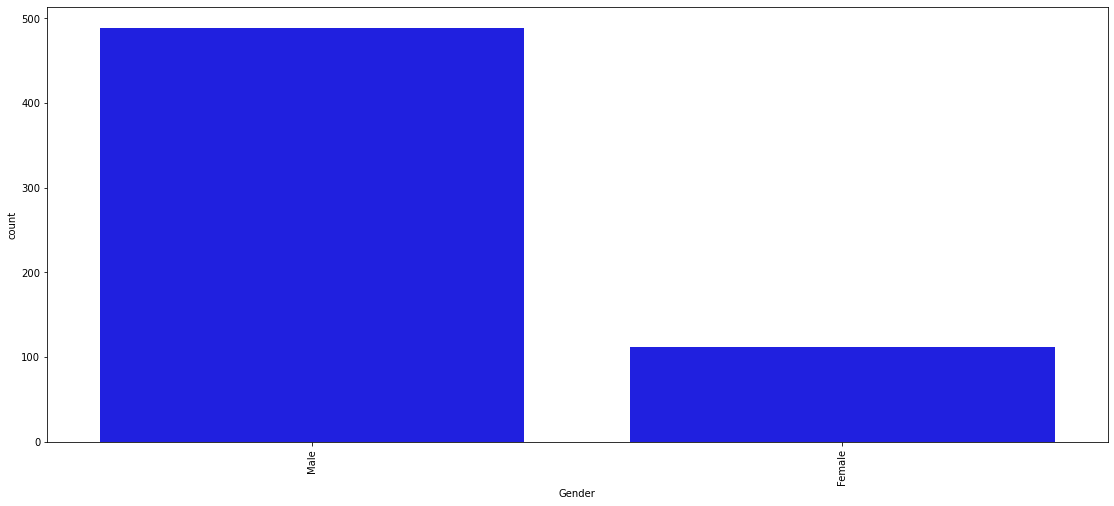



The countplot for the attribute Married is-
 AxesSubplot(0.125,0.125;0.775x0.755)


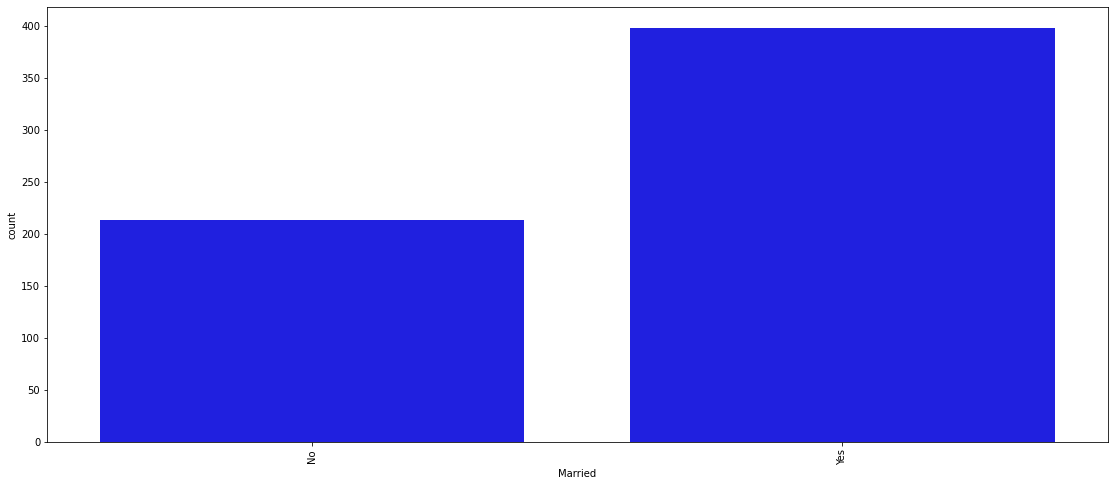



The countplot for the attribute Dependents is-
 AxesSubplot(0.125,0.125;0.775x0.755)


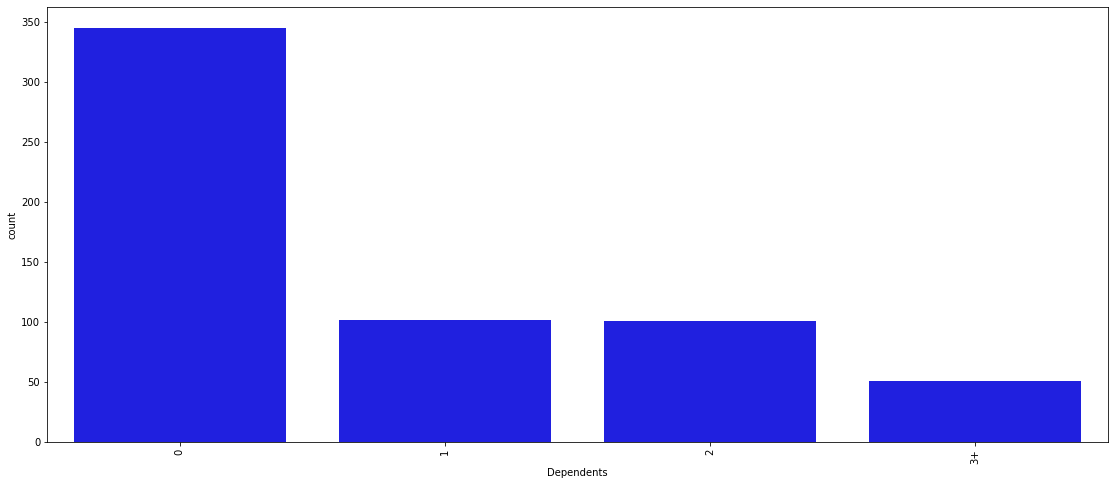



The countplot for the attribute Education is-
 AxesSubplot(0.125,0.125;0.775x0.755)


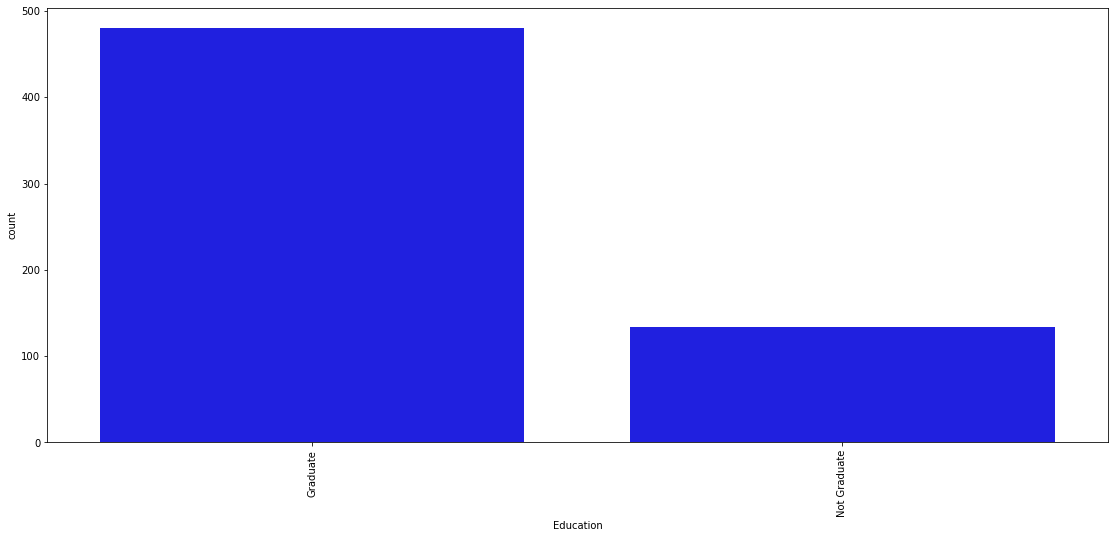



The countplot for the attribute Self_Employed is-
 AxesSubplot(0.125,0.125;0.775x0.755)


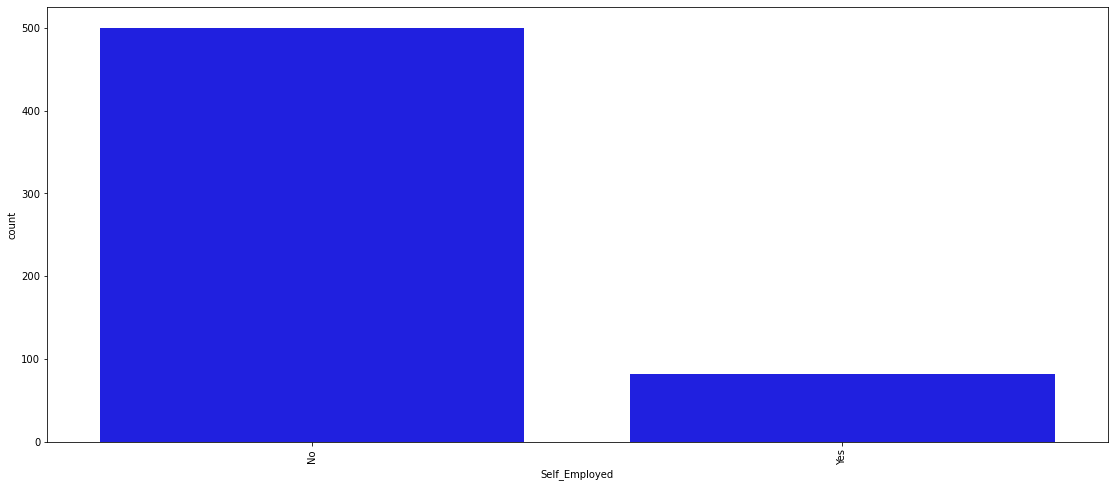



The countplot for the attribute Loan_Amount_Term is-
 AxesSubplot(0.125,0.125;0.775x0.755)


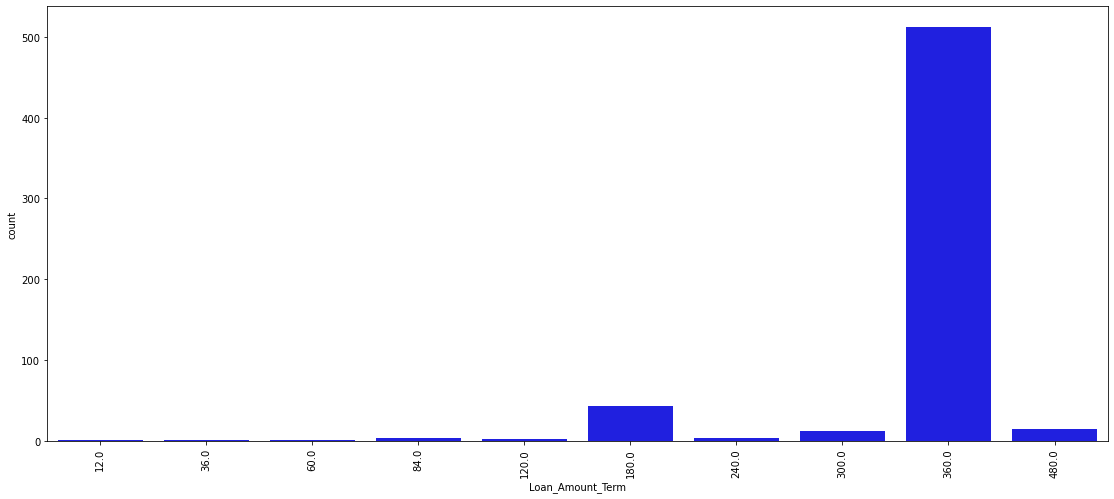



The countplot for the attribute Credit_History is-
 AxesSubplot(0.125,0.125;0.775x0.755)


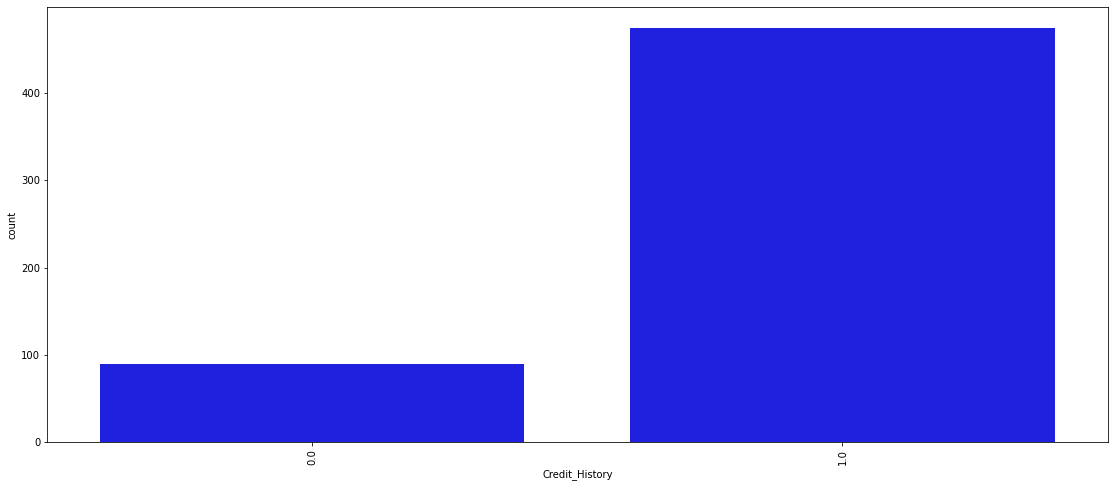



The countplot for the attribute Property_Area is-
 AxesSubplot(0.125,0.125;0.775x0.755)


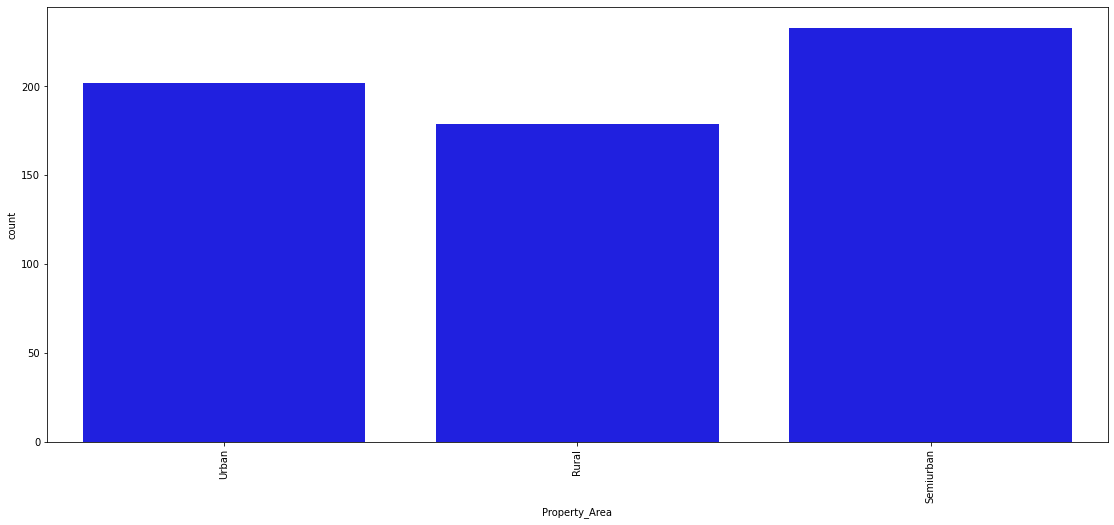



The countplot for the attribute Loan_Status is-
 AxesSubplot(0.125,0.125;0.775x0.755)


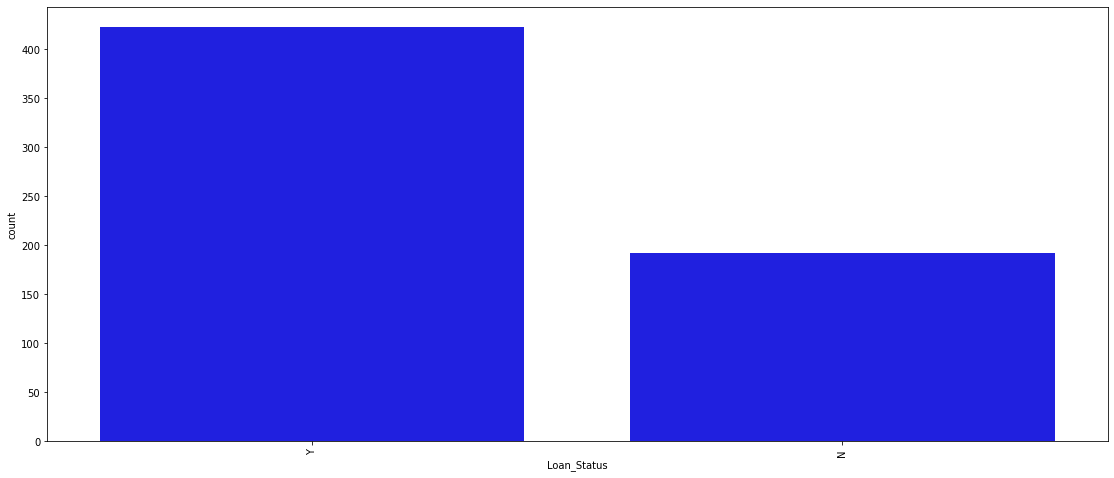

In [21]:
for i in df.columns.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount']):
    plt.figure(figsize=(19,8))
    print(f'The countplot for the attribute {i} is-\n {sns.countplot(df[i],color="BLUE")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

##### This plot basically do the counting of each unique values.
1.Out of 614 applicant approx 500 are males.

2.Approx 400 applicants are married.

3.Approx 350 applicants don't have any dependent.

4.Approx 500 applicants are graduate.

5.Out of 614 Approx 100 Applicants are self employed.

6.Approx 500 applicants has taken the loan amount tenure as 360 Months

7.More than 400 applicants has atleast taken one loan earlier

8.Approx 250 applicants belongs to semi-urban area.

9.Approx 450 applicants are approved for loan

#### 2.Histogram

The Histogram Plot for the attribute Gender is-
 AxesSubplot(0.125,0.125;0.775x0.755)


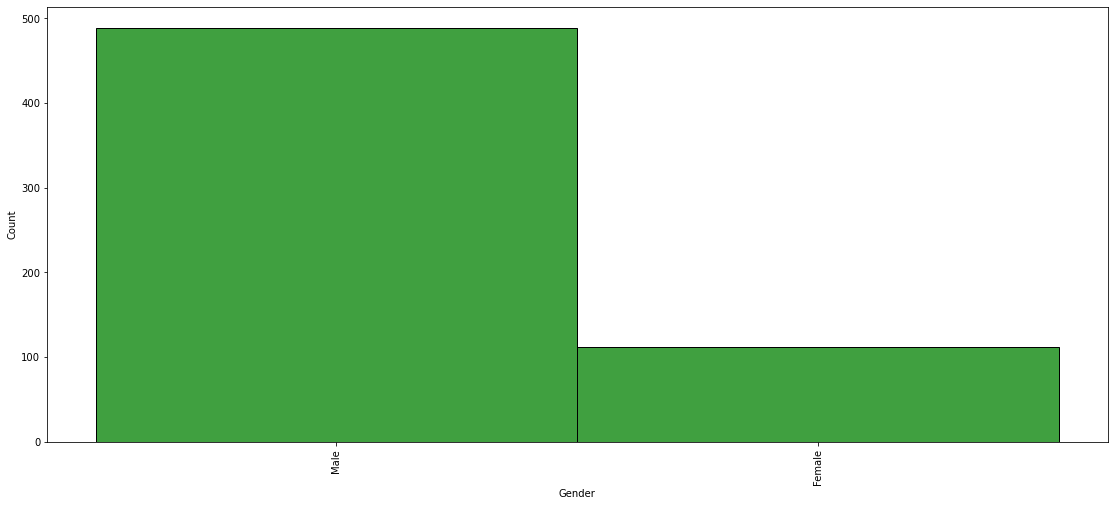



The Histogram Plot for the attribute Married is-
 AxesSubplot(0.125,0.125;0.775x0.755)


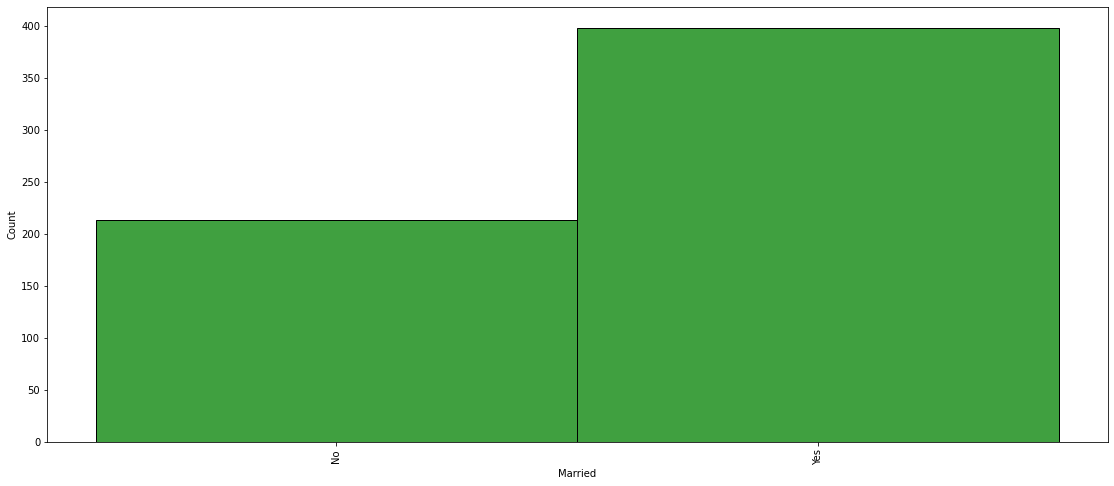



The Histogram Plot for the attribute Dependents is-
 AxesSubplot(0.125,0.125;0.775x0.755)


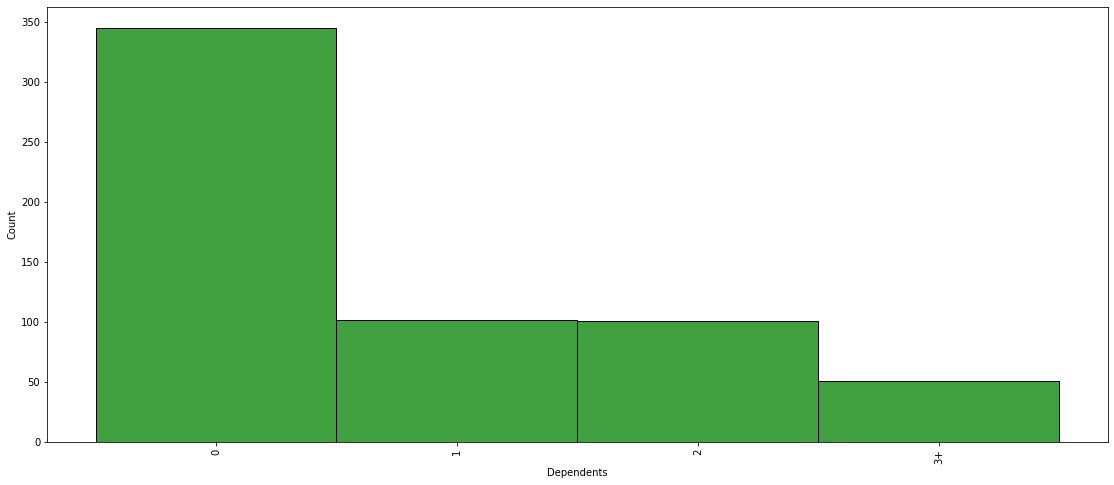



The Histogram Plot for the attribute Education is-
 AxesSubplot(0.125,0.125;0.775x0.755)


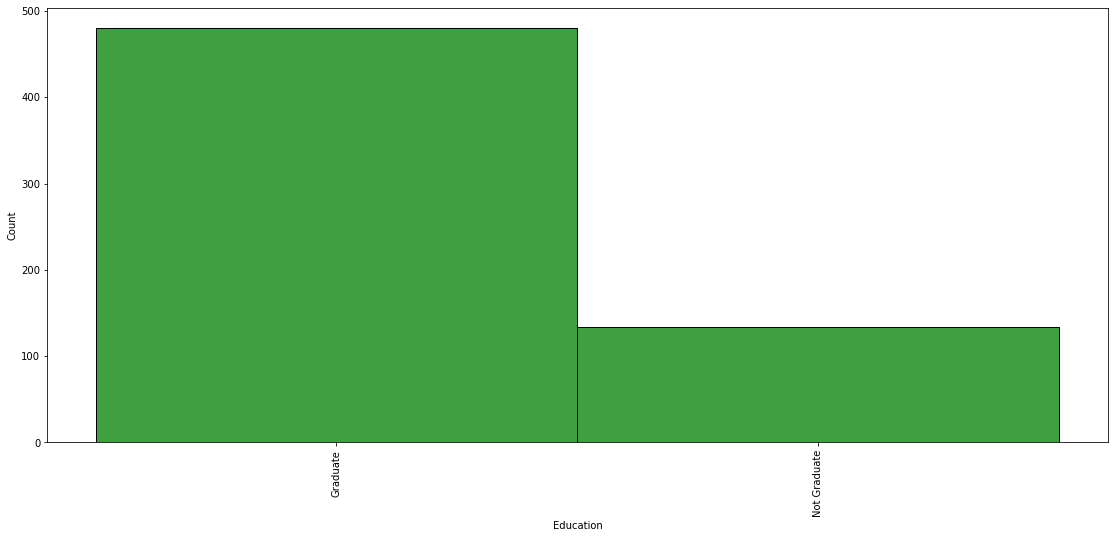



The Histogram Plot for the attribute Self_Employed is-
 AxesSubplot(0.125,0.125;0.775x0.755)


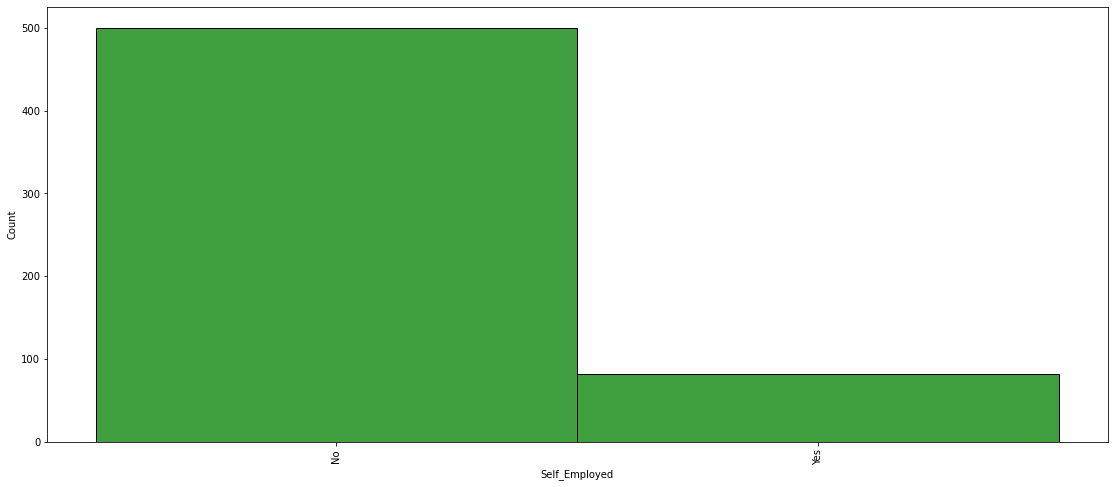



The Histogram Plot for the attribute Loan_Amount_Term is-
 AxesSubplot(0.125,0.125;0.775x0.755)


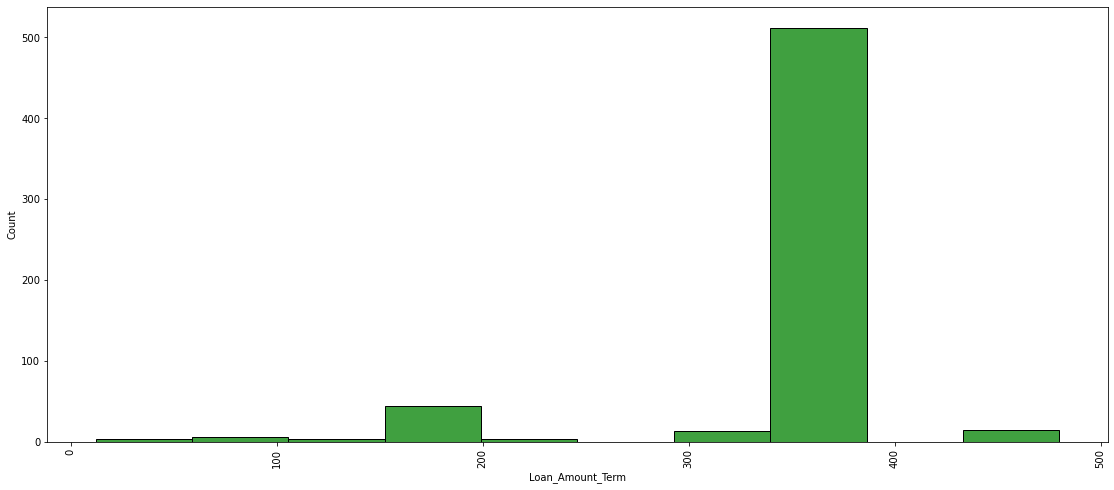



The Histogram Plot for the attribute Credit_History is-
 AxesSubplot(0.125,0.125;0.775x0.755)


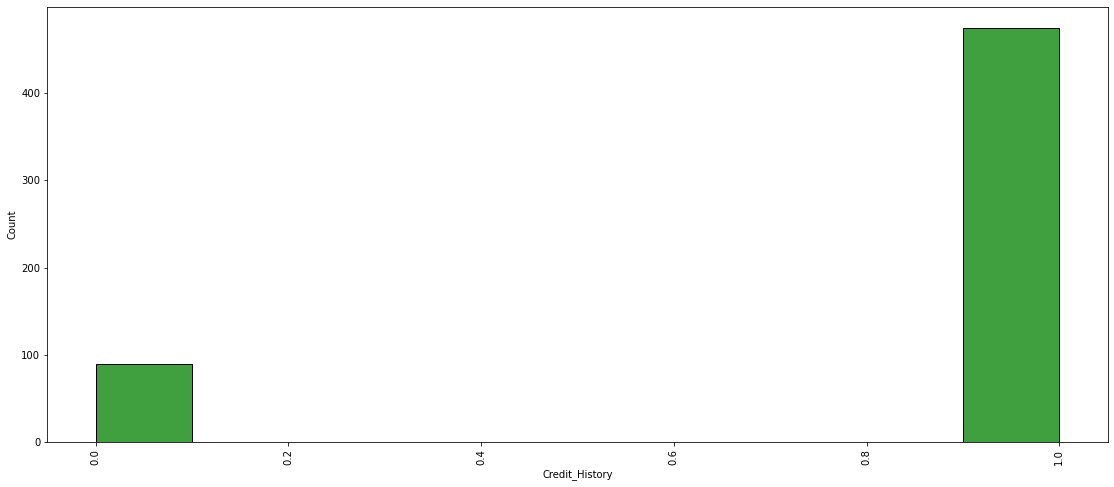



The Histogram Plot for the attribute Property_Area is-
 AxesSubplot(0.125,0.125;0.775x0.755)


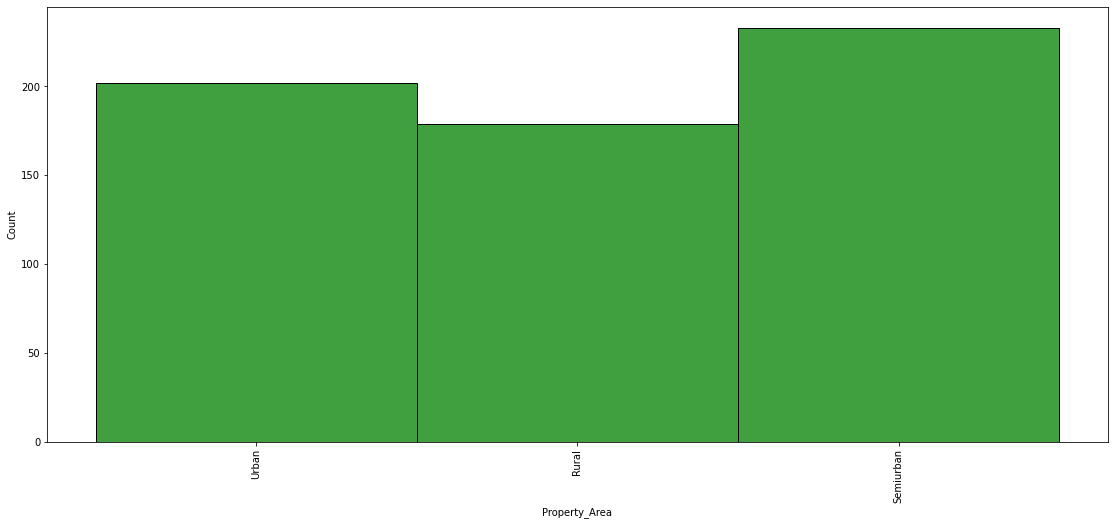



The Histogram Plot for the attribute Loan_Status is-
 AxesSubplot(0.125,0.125;0.775x0.755)


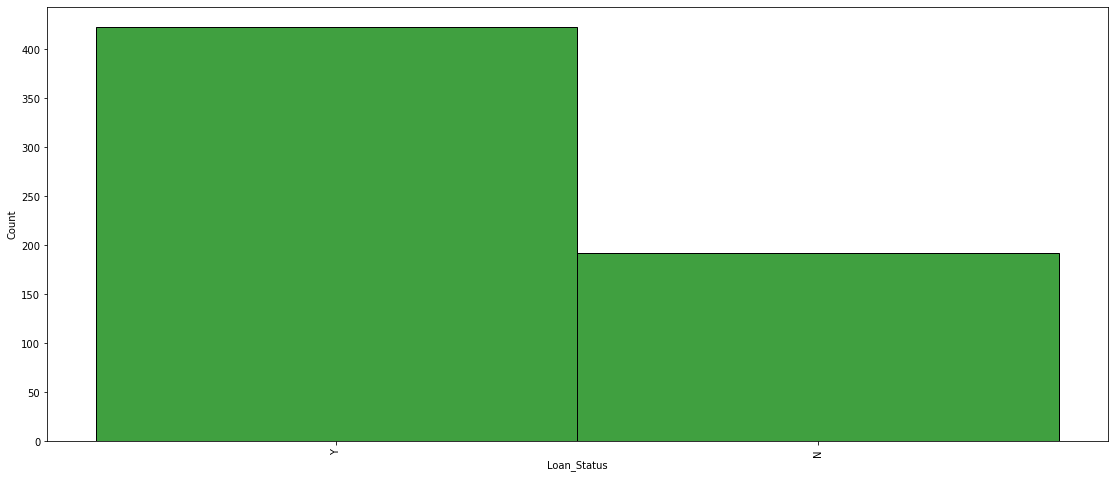

In [22]:
for i in df.columns.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount']):
    plt.figure(figsize=(19,8))
    print(f'The Histogram Plot for the attribute {i} is-\n {sns.histplot(df[i],color="green",bins=10)}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

##### Graduate Male professionals who are working in a company,being married and belongs to the semi-urban area having least dependents in the family has applied for the loan in high numbers and most of the cases are approved for the loan.

#### 3.Scatterplot

The Scatter Plot for the attribute "Loan_Status" & "Loan_ID" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


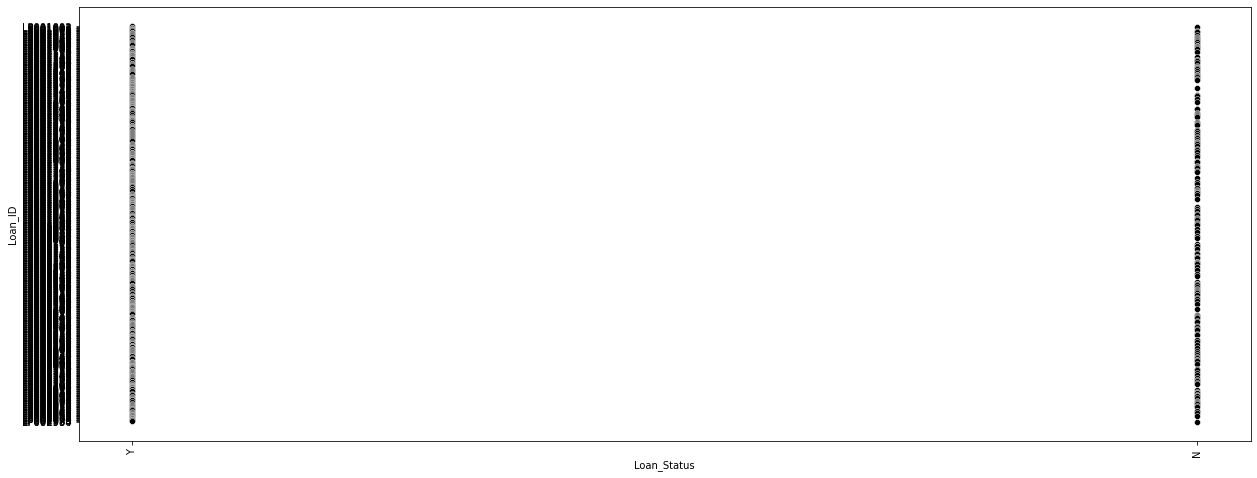



The Scatter Plot for the attribute "Loan_Status" & "Gender" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


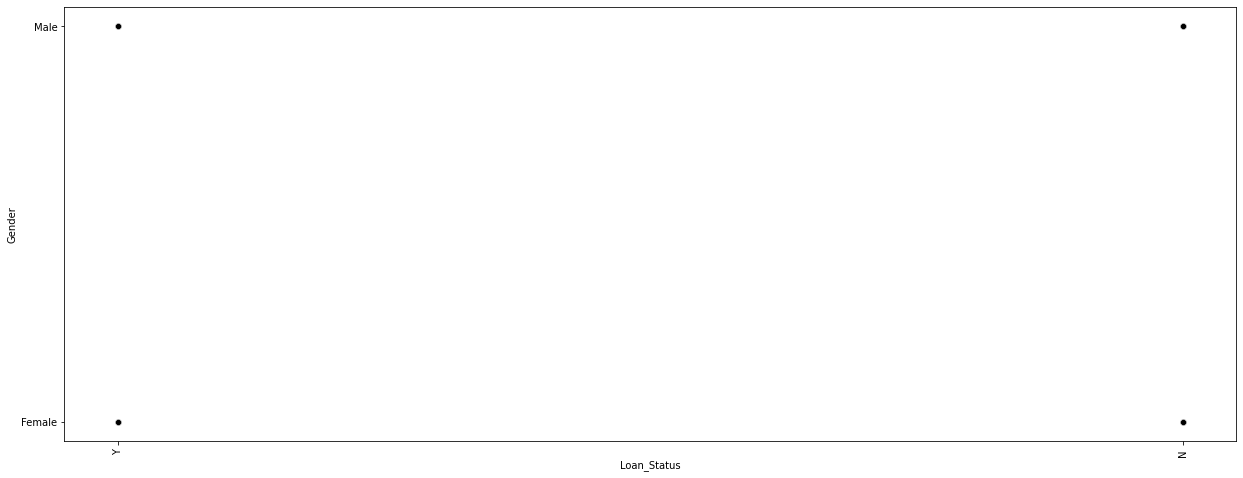



The Scatter Plot for the attribute "Loan_Status" & "Married" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


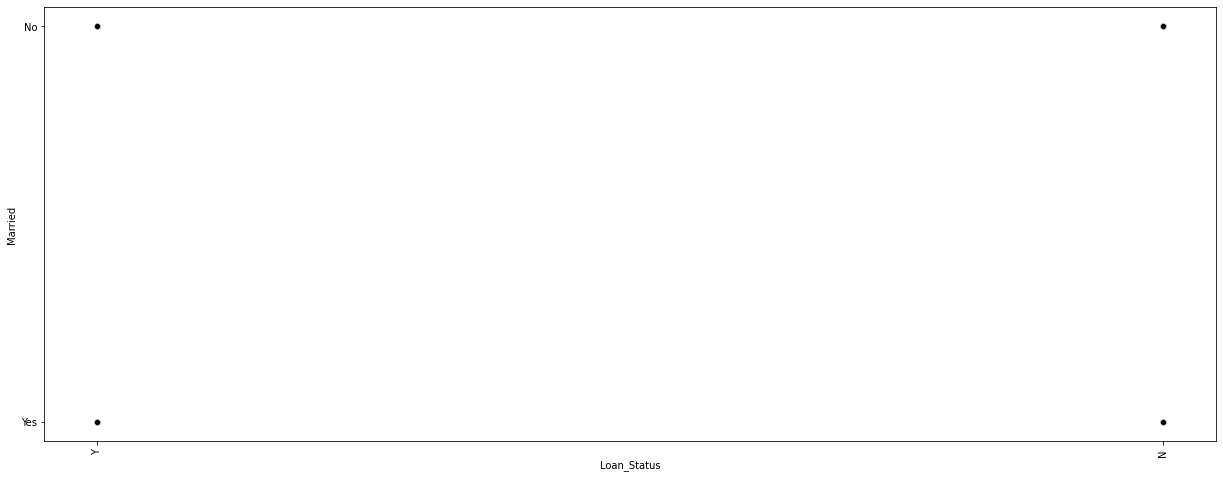



The Scatter Plot for the attribute "Loan_Status" & "Dependents" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


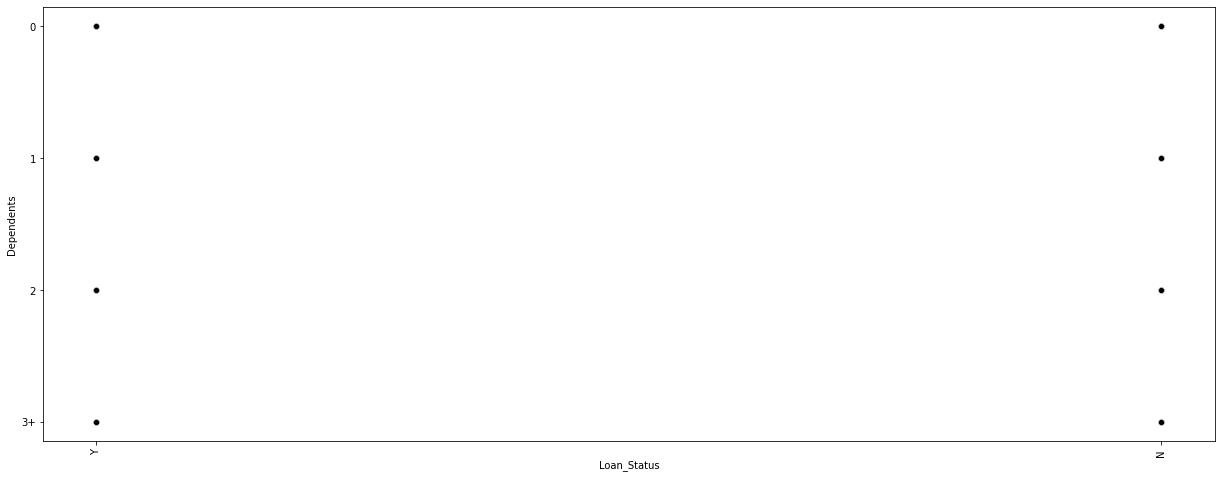



The Scatter Plot for the attribute "Loan_Status" & "Education" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


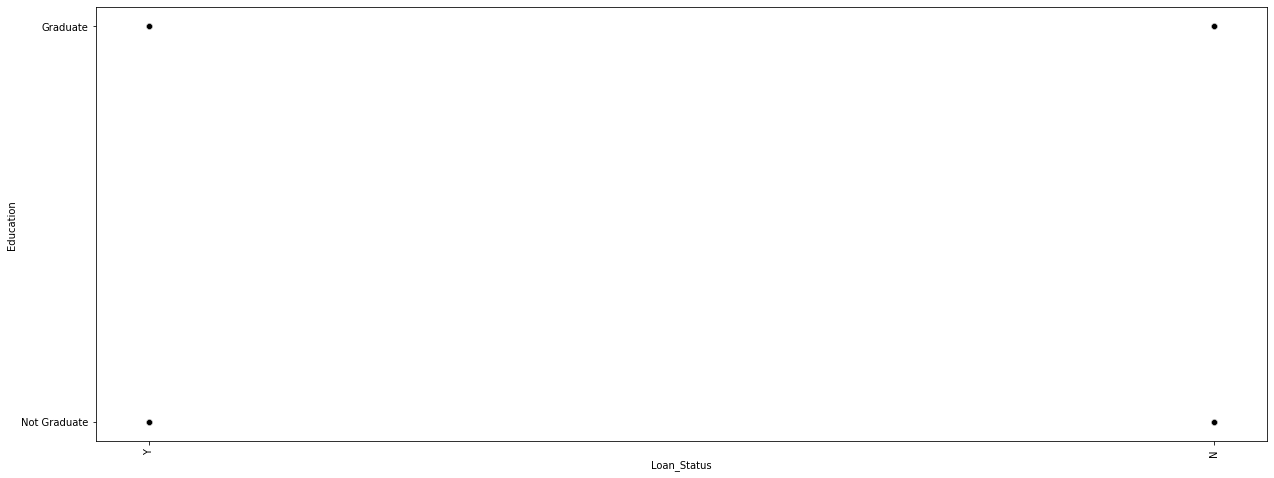



The Scatter Plot for the attribute "Loan_Status" & "Self_Employed" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


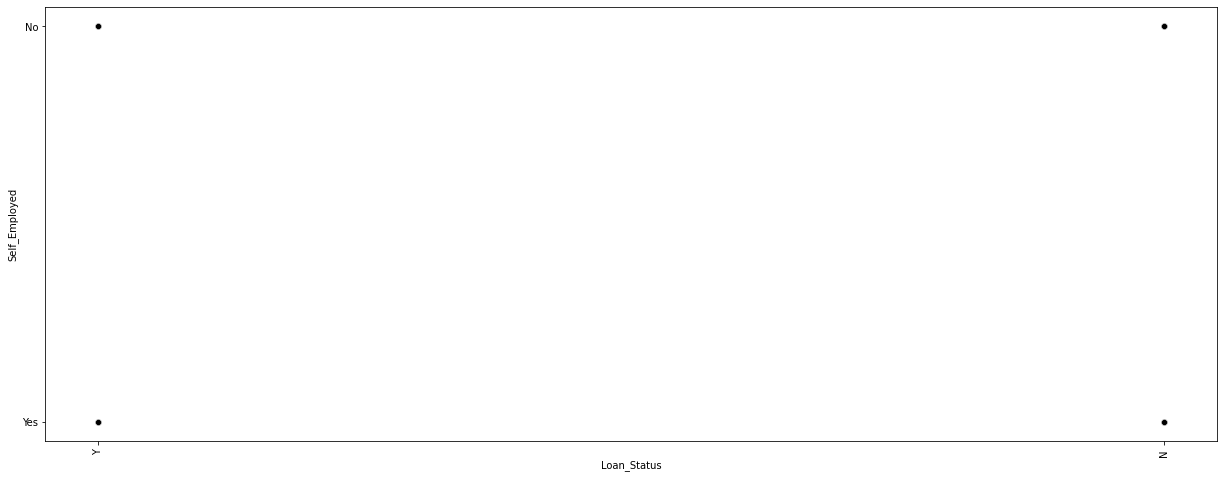



The Scatter Plot for the attribute "Loan_Status" & "ApplicantIncome" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


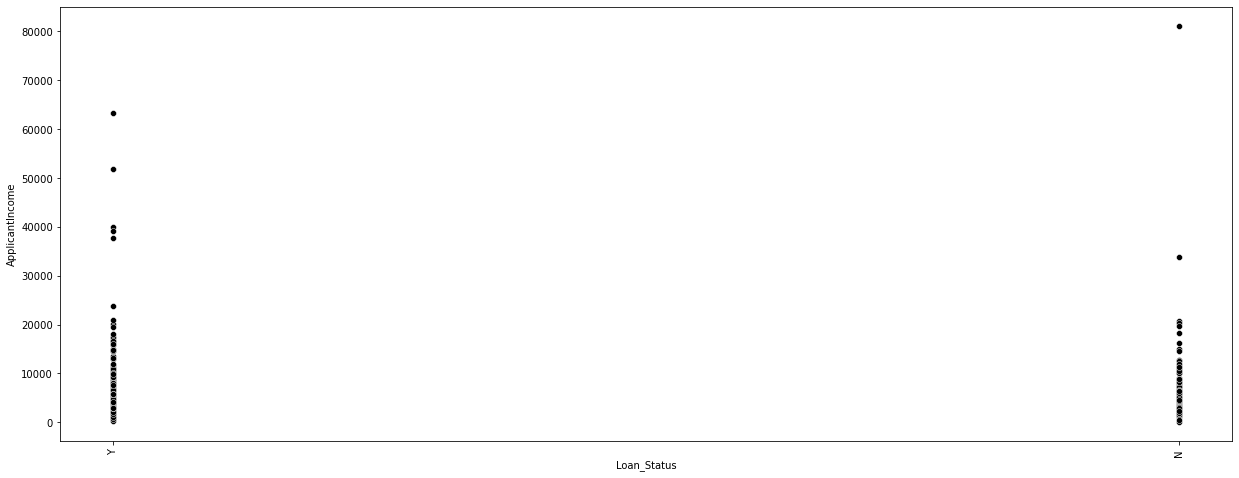



The Scatter Plot for the attribute "Loan_Status" & "CoapplicantIncome" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


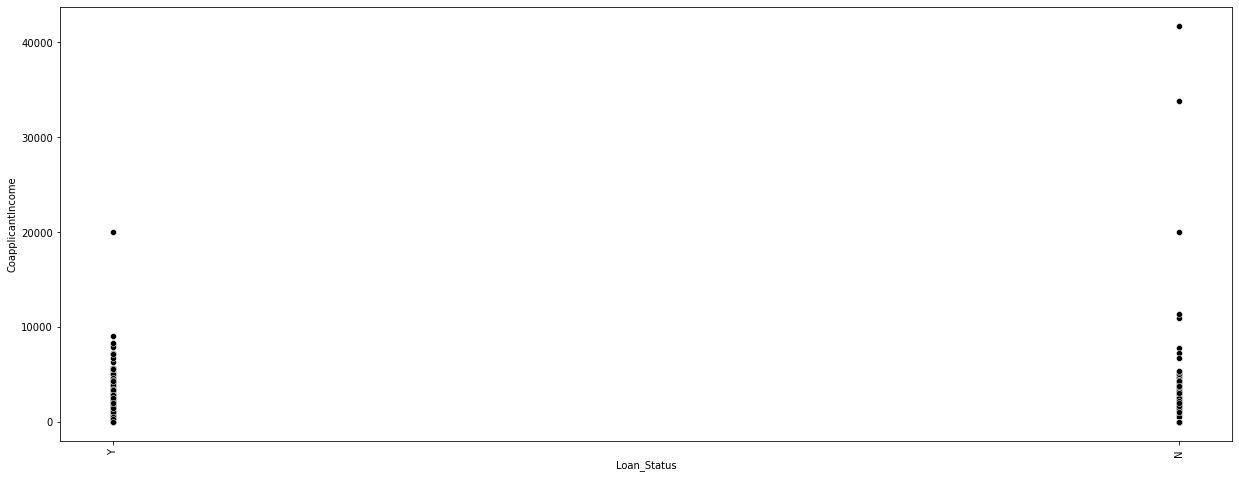



The Scatter Plot for the attribute "Loan_Status" & "LoanAmount" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


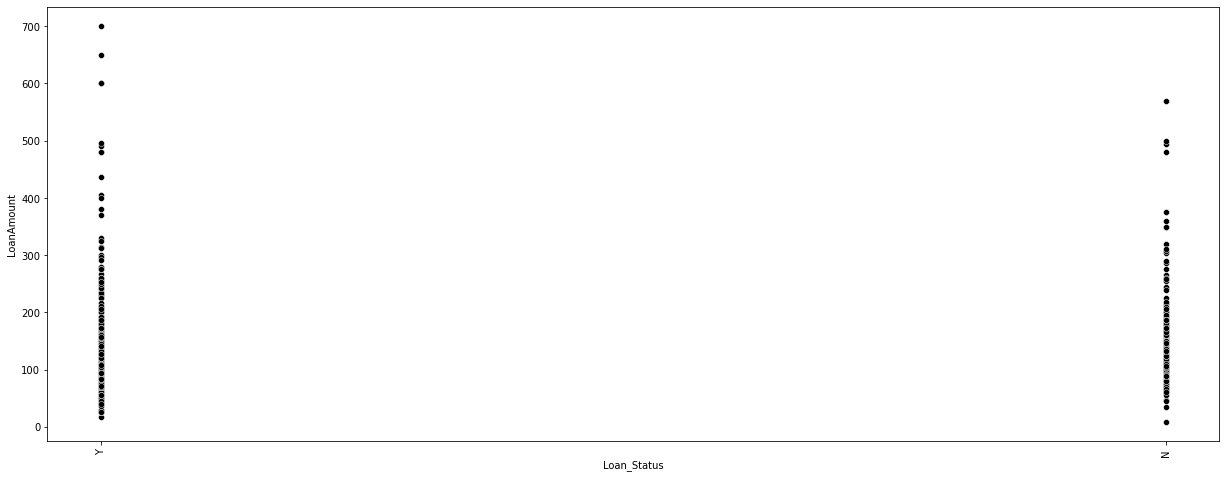



The Scatter Plot for the attribute "Loan_Status" & "Loan_Amount_Term" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


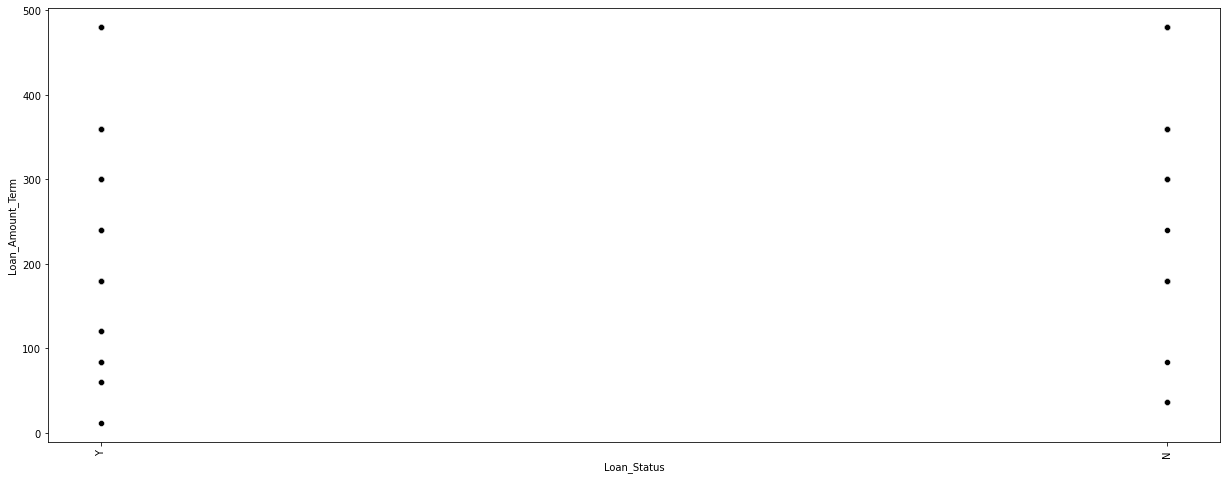



The Scatter Plot for the attribute "Loan_Status" & "Credit_History" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


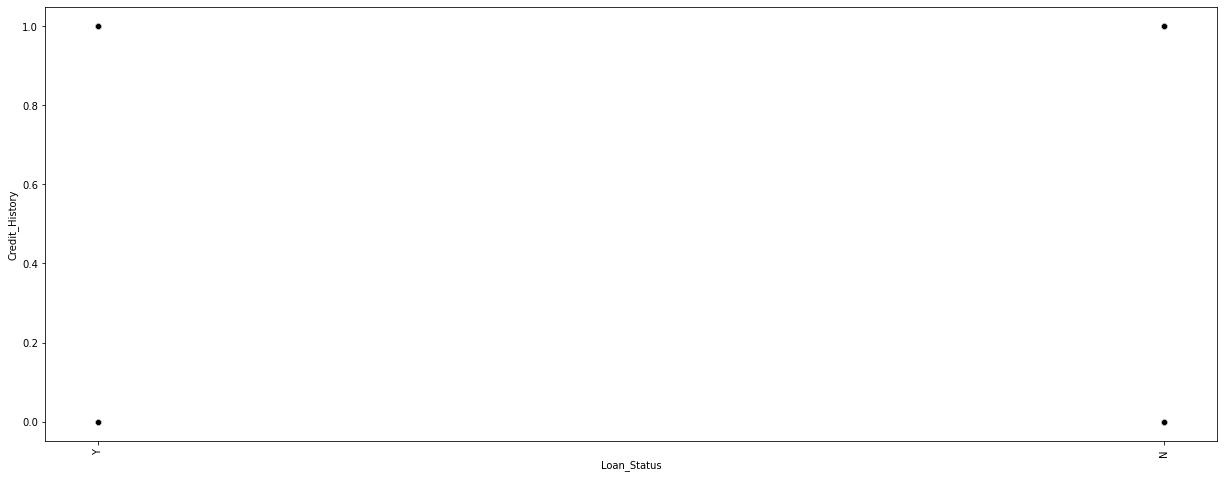



The Scatter Plot for the attribute "Loan_Status" & "Property_Area" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


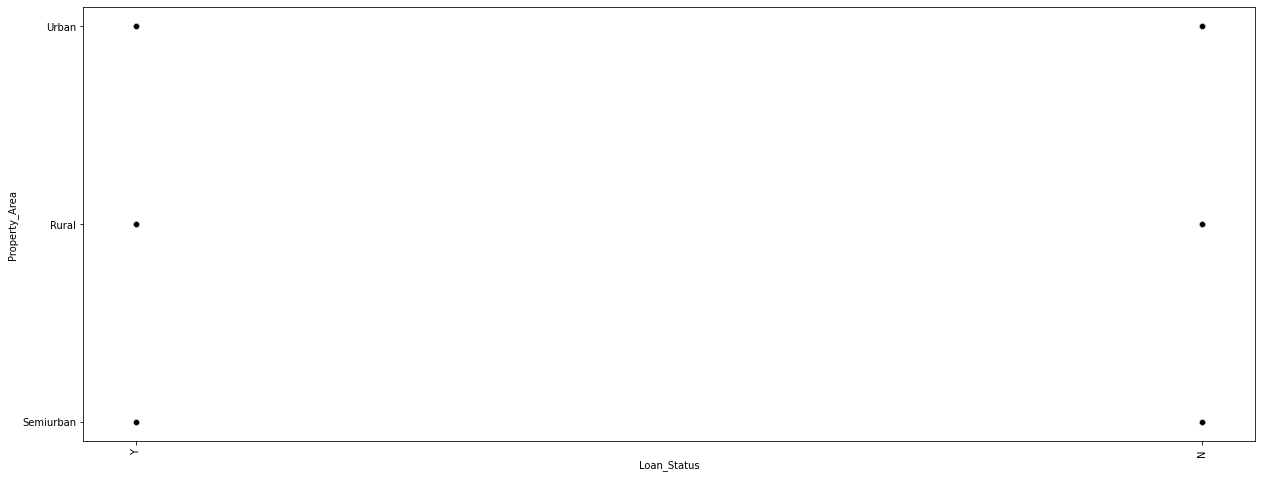



The Scatter Plot for the attribute "Loan_Status" & "Loan_Status" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


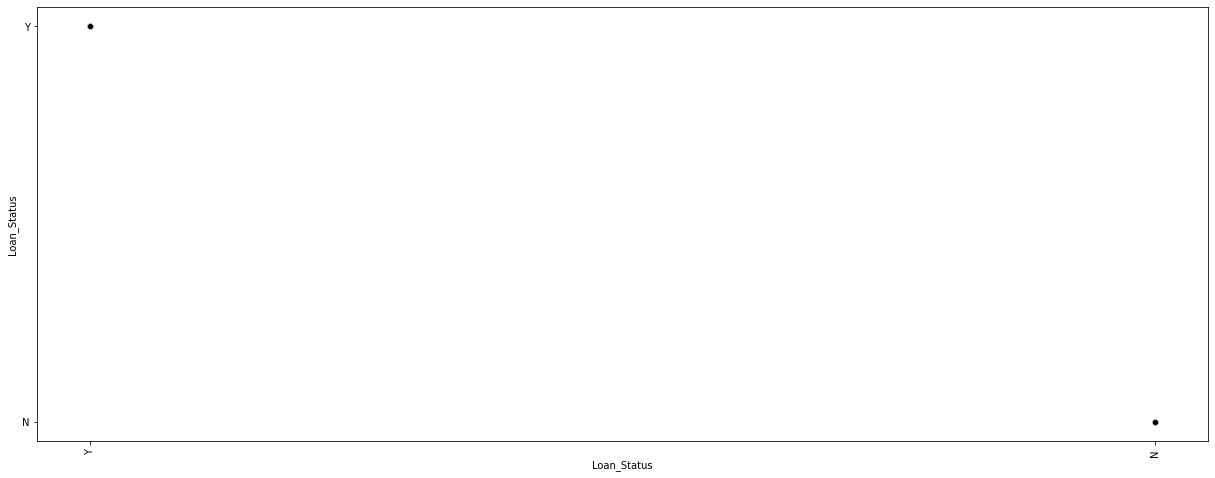

In [23]:
for i in df.columns:
    plt.figure(figsize=(21,8))
    print(f'The Scatter Plot for the attribute "Loan_Status" & "{i}" is-\n {sns.scatterplot(df.Loan_Status,df[i],color="black")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

Above all the graphs are showing the distribution of attributes w.r.t. target variable 'Loan_Status'

#### 4.Lineplot

The Line Plot for the attribute "Loan_Status" & "Loan_ID" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


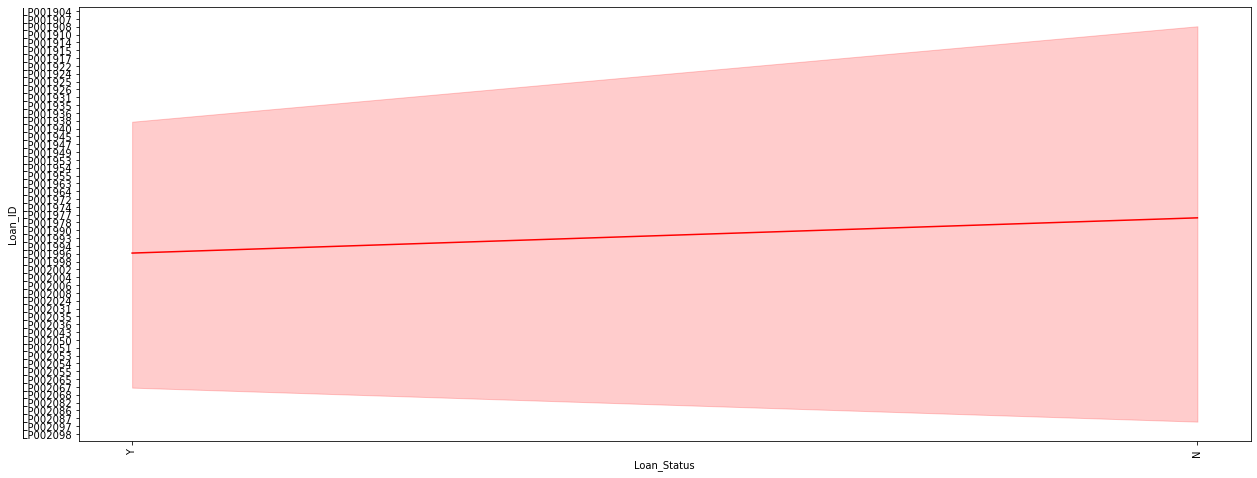



The Line Plot for the attribute "Loan_Status" & "Gender" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


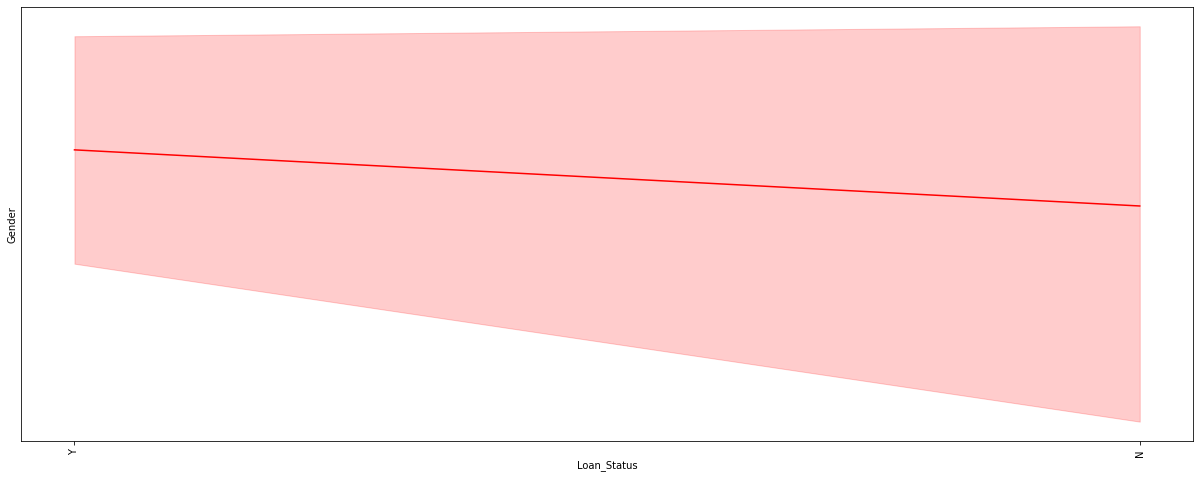



The Line Plot for the attribute "Loan_Status" & "Married" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


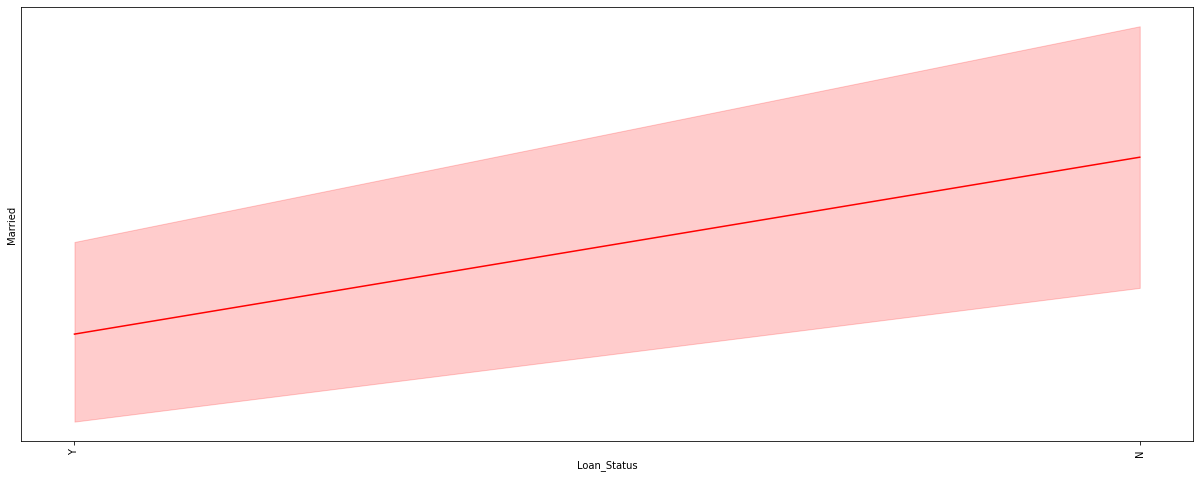



The Line Plot for the attribute "Loan_Status" & "Dependents" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


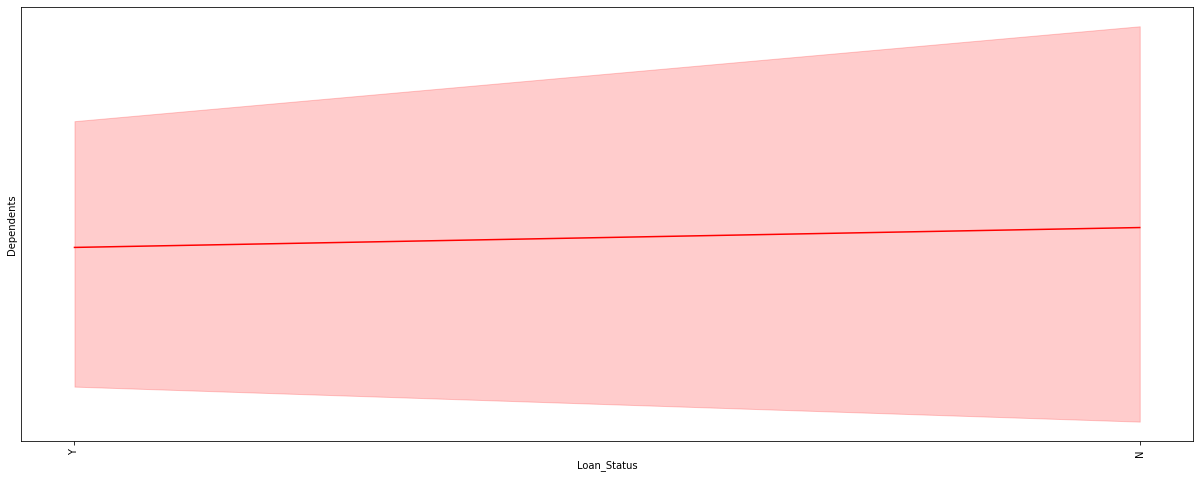



The Line Plot for the attribute "Loan_Status" & "Education" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


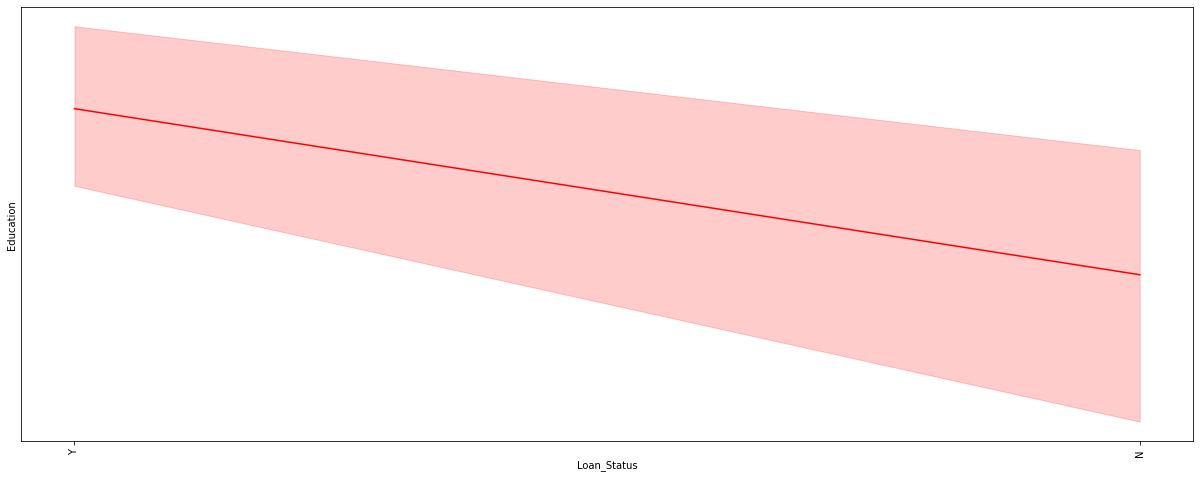



The Line Plot for the attribute "Loan_Status" & "Self_Employed" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


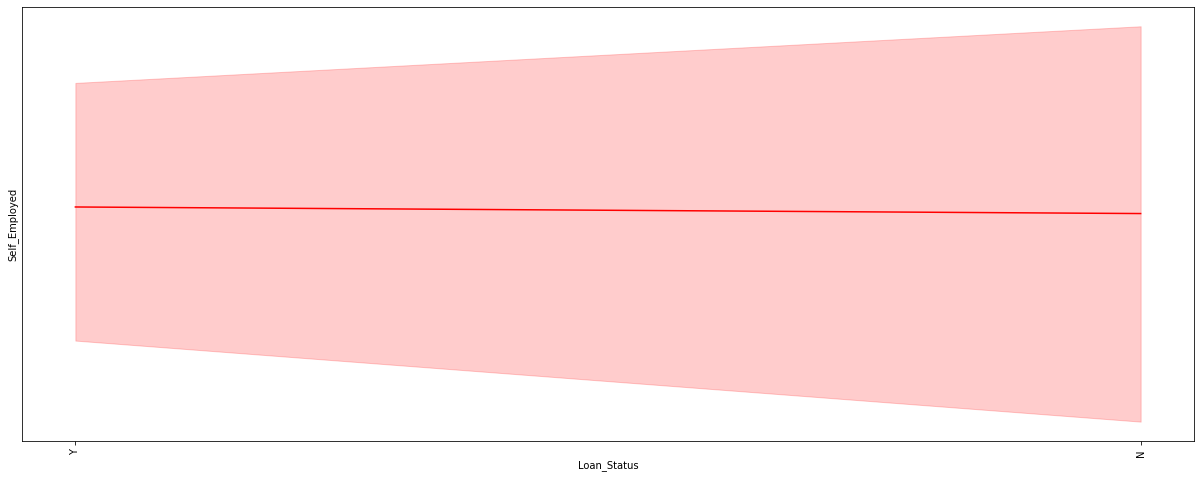



The Line Plot for the attribute "Loan_Status" & "ApplicantIncome" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


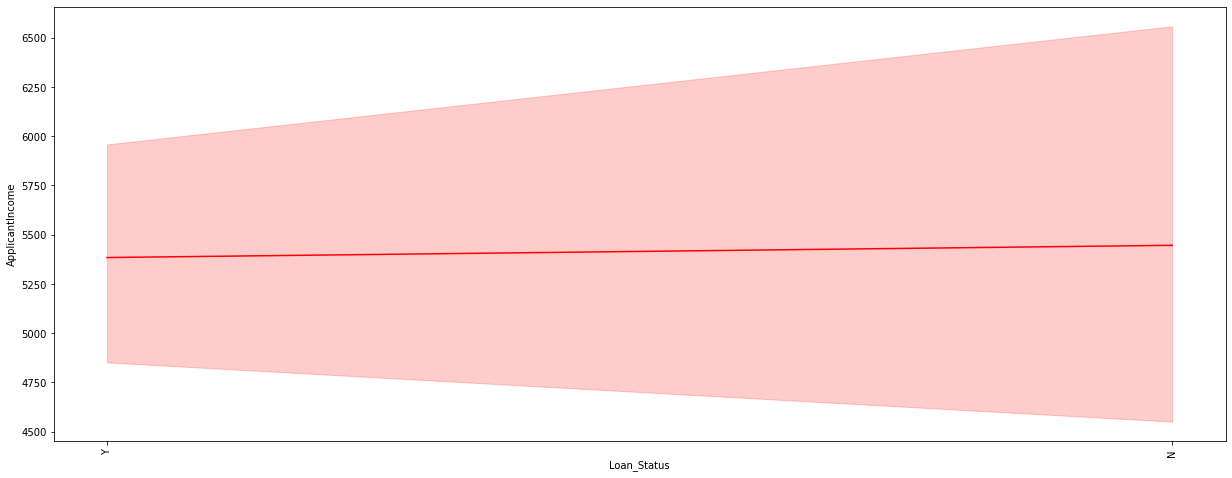



The Line Plot for the attribute "Loan_Status" & "CoapplicantIncome" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


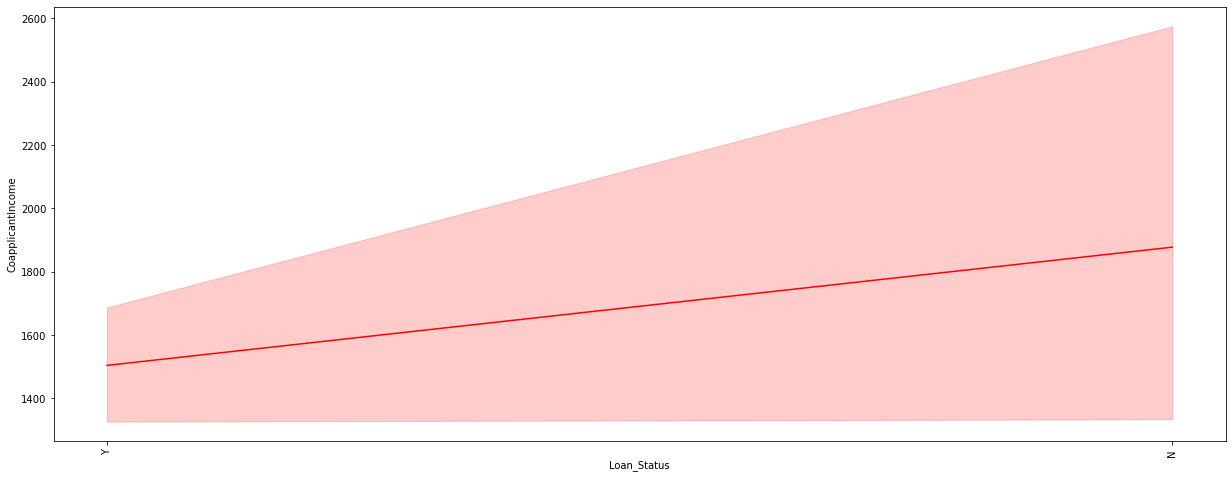



The Line Plot for the attribute "Loan_Status" & "LoanAmount" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


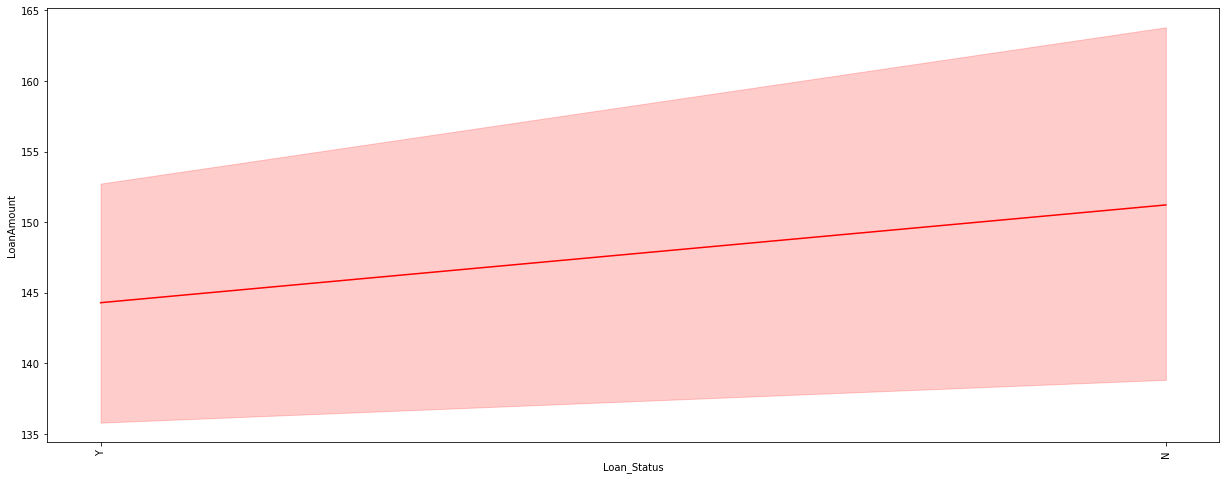



The Line Plot for the attribute "Loan_Status" & "Loan_Amount_Term" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


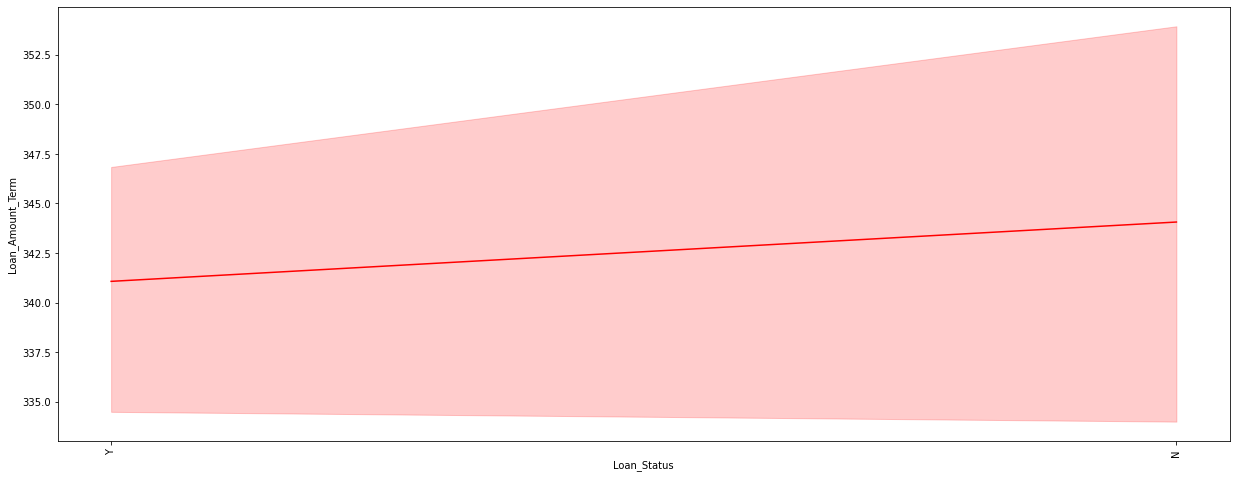



The Line Plot for the attribute "Loan_Status" & "Credit_History" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


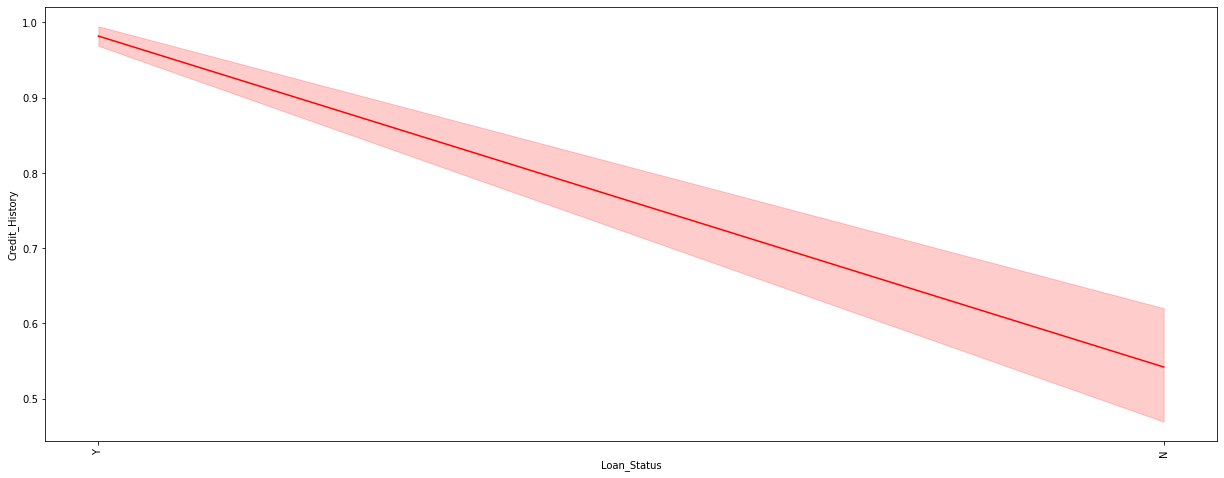



The Line Plot for the attribute "Loan_Status" & "Property_Area" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


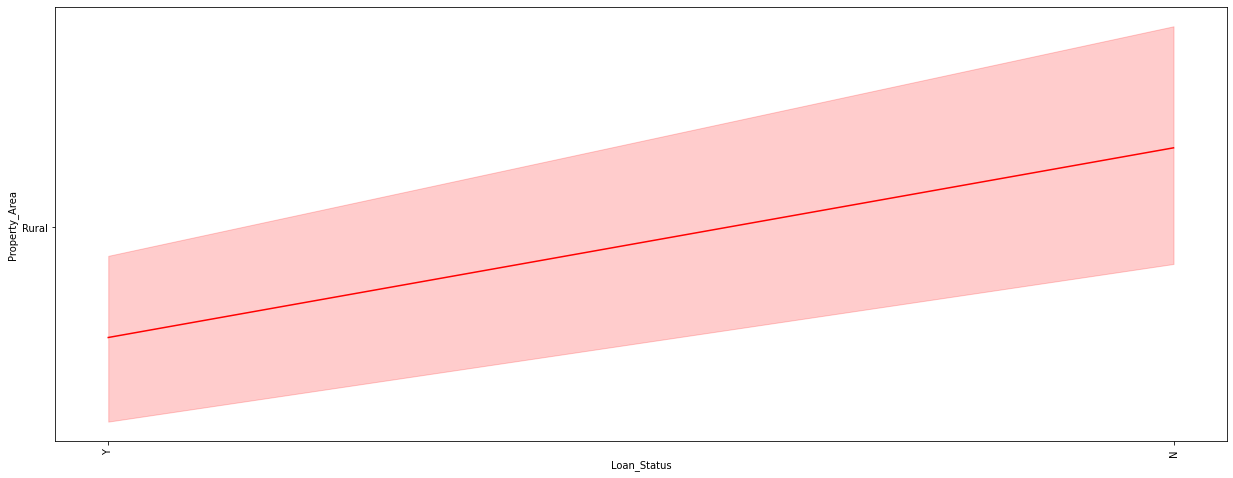



The Line Plot for the attribute "Loan_Status" & "Loan_Status" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


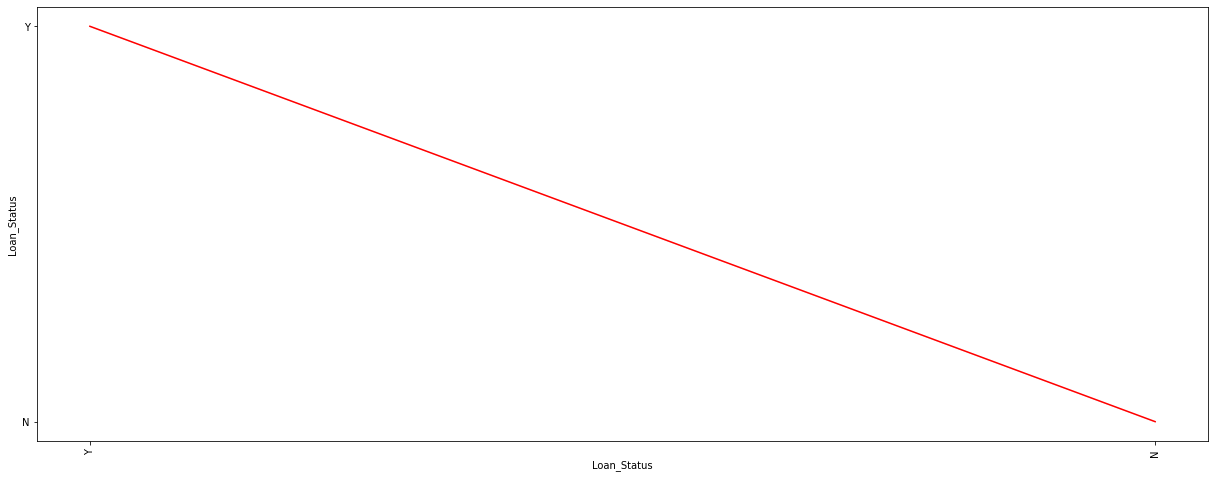

In [24]:
for i in df.columns:
    plt.figure(figsize=(21,8))
    print(f'The Line Plot for the attribute "Loan_Status" & "{i}" is-\n {sns.lineplot(df.Loan_Status,df[i],color="red")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

##### These graphs are showing the distribution trend w.r.t. target variable.

#### 5.Categorical Plotting

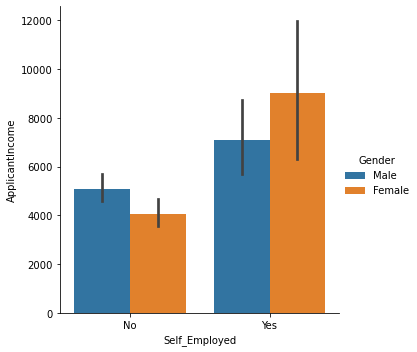

In [27]:
sns.catplot(x='Self_Employed',y='ApplicantIncome',hue='Gender',data=df,kind='bar')
plt.show()

The female self_employed applicants who are applied for the loan has income around 9000

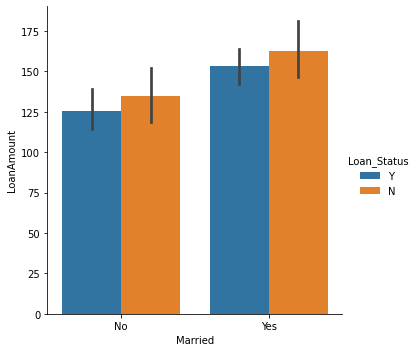

In [32]:
sns.catplot(x='Married',y='LoanAmount',hue='Loan_Status',data=df,kind='bar')
plt.show()

The married applicants who has applied for the loan amount approx 150 are approved for the loan whereas the married applicants who has applied for the loan amount approx 165 are not eligible for the loan

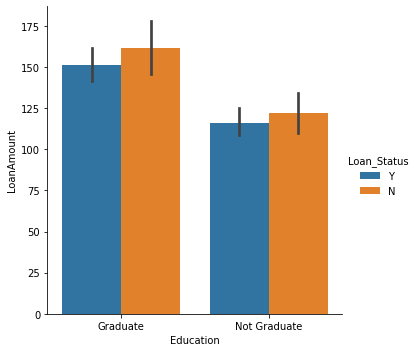

In [31]:
sns.catplot(x='Education',y='LoanAmount',hue='Loan_Status',data=df,kind='bar')
plt.show()

Most of the applicants who are graduate and applied for the loan amount approx 150 are approved for taking the loan where as if they apply above 160 they are not eligible for the loan

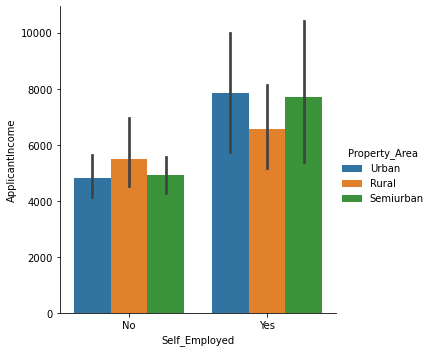

In [35]:
sns.catplot(x='Self_Employed',y='ApplicantIncome',hue='Property_Area',data=df,kind='bar')
plt.show()

Self-employed people who lives in urban area has the highest income of approx 8000

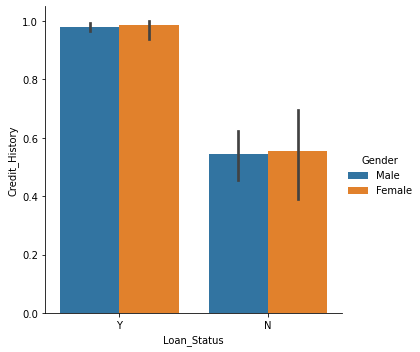

In [37]:
sns.catplot(x='Loan_Status',y='Credit_History',hue='Gender',data=df,kind='bar')
plt.show()

Those Male and female both the applicants who has atleast 1 credit history are eligible for the loan

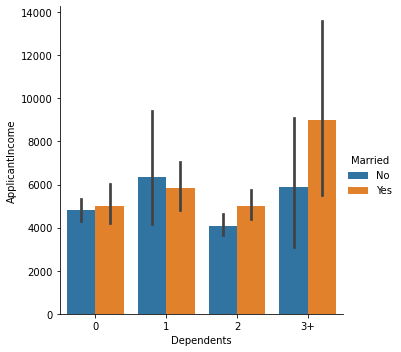

In [39]:
sns.catplot(x='Dependents',y='ApplicantIncome',hue='Married',data=df,kind='bar')
plt.show()

Applicant those are married and having three and above dependents in the family have income of more than 8000

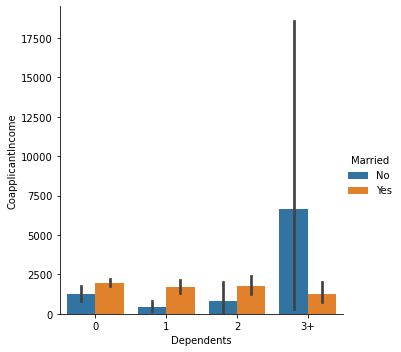

In [40]:
sns.catplot(x='Dependents',y='CoapplicantIncome',hue='Married',data=df,kind='bar')
plt.show()

Applicants those are not married and having three and above independents in the family,their coapplicant income is approx 6000

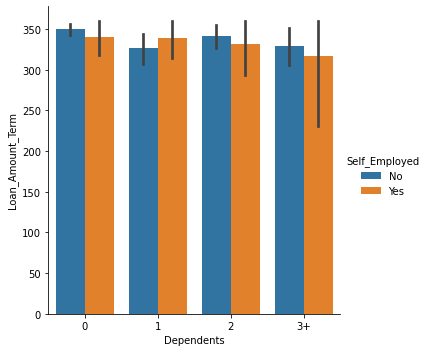

In [41]:
sns.catplot(x='Dependents',y='Loan_Amount_Term',hue='Self_Employed',data=df,kind='bar')
plt.show()

Applicants who are not self-employed and have no dependents in the family has taken loan tenure as approx 350Months

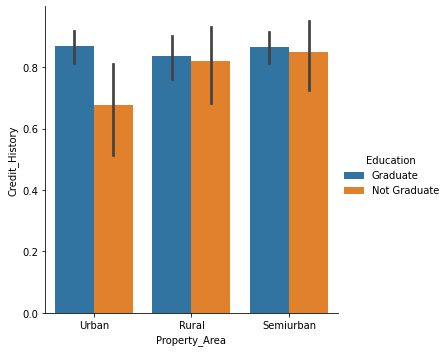

In [42]:
sns.catplot(x='Property_Area',y='Credit_History',hue='Education',data=df,kind='bar')
plt.show()

Applicants those are graduate and living in urban areas has credit history as 1 and they are eligible for loan in most of the cases

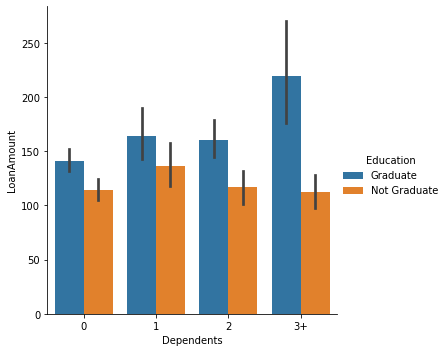

In [44]:
sns.catplot(x='Dependents',y='LoanAmount',hue='Education',data=df,kind='bar')
plt.show()

Graduate applicants having more than 3 dependents in the family has applied for the loan amount of approx 225

### Replacing the Null Values and Zero's

In [220]:
import sklearn
from sklearn.impute import SimpleImputer

In [221]:
#these Categorical columns have null value presence hence will replace it by mode of the respective columns 
l=['Gender','Married','Dependents','Self_Employed']
for i in l:
    df[i]=SimpleImputer(missing_values=np.nan,strategy='most_frequent').fit_transform(df[i].values.reshape(-1,1))

In [222]:
#these Numeric columns have null value presence hence will replace it by median of the respective columns 
l=['LoanAmount','Loan_Amount_Term','Credit_History']
for i in l:
    df[i]=SimpleImputer(missing_values=np.nan,strategy='median').fit_transform(df[i].values.reshape(-1,1))

In [223]:
df.isnull().sum().sum()

0

###### Now as we can see that null value presence in the dataset is zero

In [224]:
#this column has lots of zero's presence hence will replace it by it's mean
df['CoapplicantIncome']=df['CoapplicantIncome'].replace(0,df['CoapplicantIncome'].mean())

### Encoding
##### Now I'll convert all the categorical columns into numeric one by applying label encoder technique
#### Label Encoder

In [225]:
#Encoder
from sklearn.preprocessing import LabelEncoder
p=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for u in p:
    df[u]=LabelEncoder().fit_transform(df[u].astype(str))

In [226]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,1621.245798,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.000000,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,1621.245798,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.000000,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,1621.245798,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,1621.245798,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,1621.245798,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.000000,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,1621.245798,187.0,360.0,1.0,2,1


#### 6.ViolinPlot

The Violin-Plot for the attribute Loan_ID is-
 AxesSubplot(0.125,0.125;0.775x0.755)


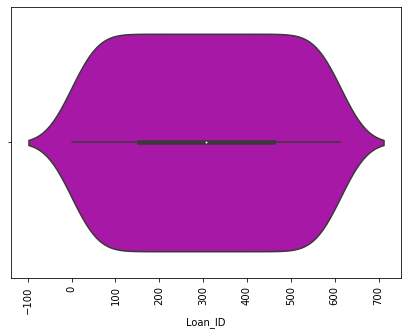



The Violin-Plot for the attribute Gender is-
 AxesSubplot(0.125,0.125;0.775x0.755)


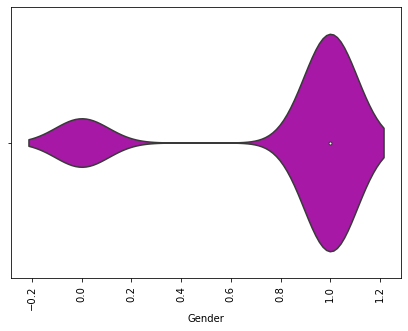



The Violin-Plot for the attribute Married is-
 AxesSubplot(0.125,0.125;0.775x0.755)


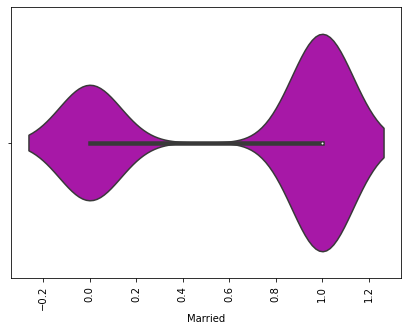



The Violin-Plot for the attribute Dependents is-
 AxesSubplot(0.125,0.125;0.775x0.755)


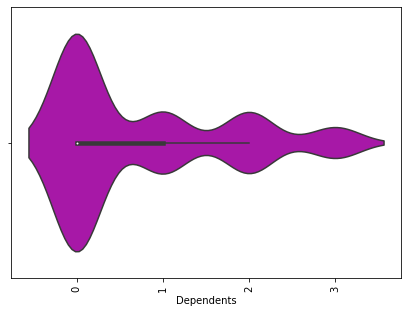



The Violin-Plot for the attribute Education is-
 AxesSubplot(0.125,0.125;0.775x0.755)


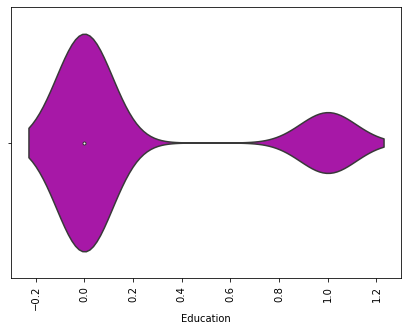



The Violin-Plot for the attribute Self_Employed is-
 AxesSubplot(0.125,0.125;0.775x0.755)


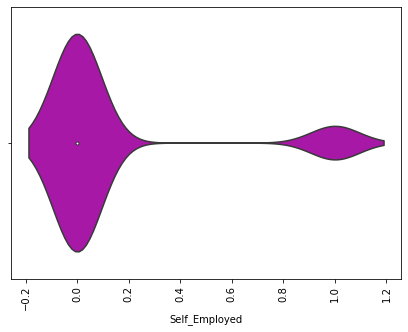



The Violin-Plot for the attribute ApplicantIncome is-
 AxesSubplot(0.125,0.125;0.775x0.755)


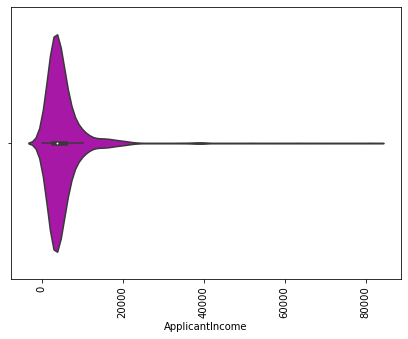



The Violin-Plot for the attribute CoapplicantIncome is-
 AxesSubplot(0.125,0.125;0.775x0.755)


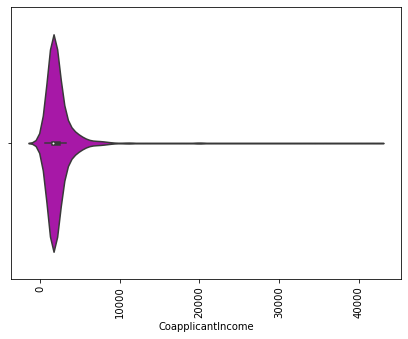



The Violin-Plot for the attribute LoanAmount is-
 AxesSubplot(0.125,0.125;0.775x0.755)


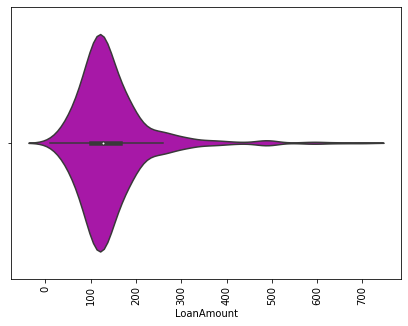



The Violin-Plot for the attribute Loan_Amount_Term is-
 AxesSubplot(0.125,0.125;0.775x0.755)


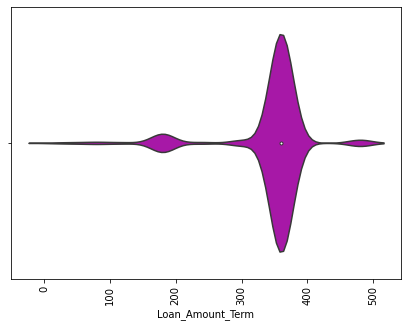



The Violin-Plot for the attribute Credit_History is-
 AxesSubplot(0.125,0.125;0.775x0.755)


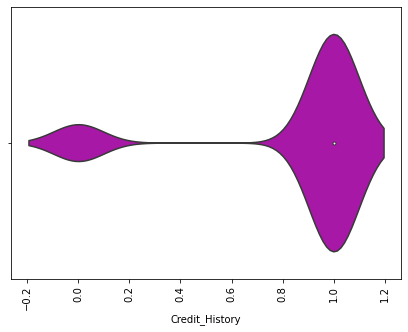



The Violin-Plot for the attribute Property_Area is-
 AxesSubplot(0.125,0.125;0.775x0.755)


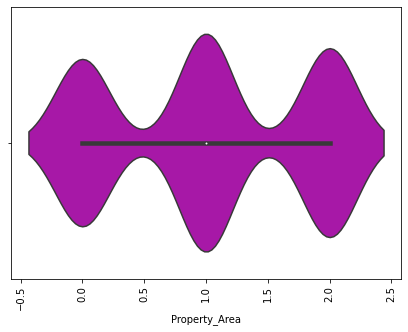



The Violin-Plot for the attribute Loan_Status is-
 AxesSubplot(0.125,0.125;0.775x0.755)


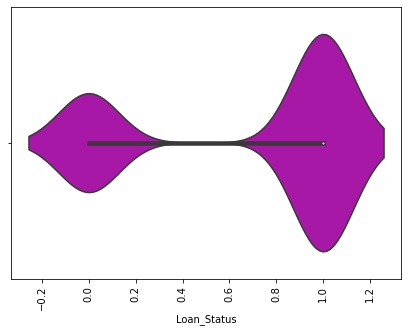

In [19]:
for i in df.columns:
    plt.figure(figsize=(7,5))
    print(f'The Violin-Plot for the attribute {i} is-\n {sns.violinplot(df[i],color="m")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

##### Violin plot basically indicates that what is the width of datapoints having most frequency.
##### As we can see in this plot we can say that most of the applicants have income range b/w (0-20000) and coapplicants income range in b/w (0-10000).
##### Most of the applicants are applying for the loan amount range b/w(100-200) and having tenure range (360-400)

#### 7.Pairplot

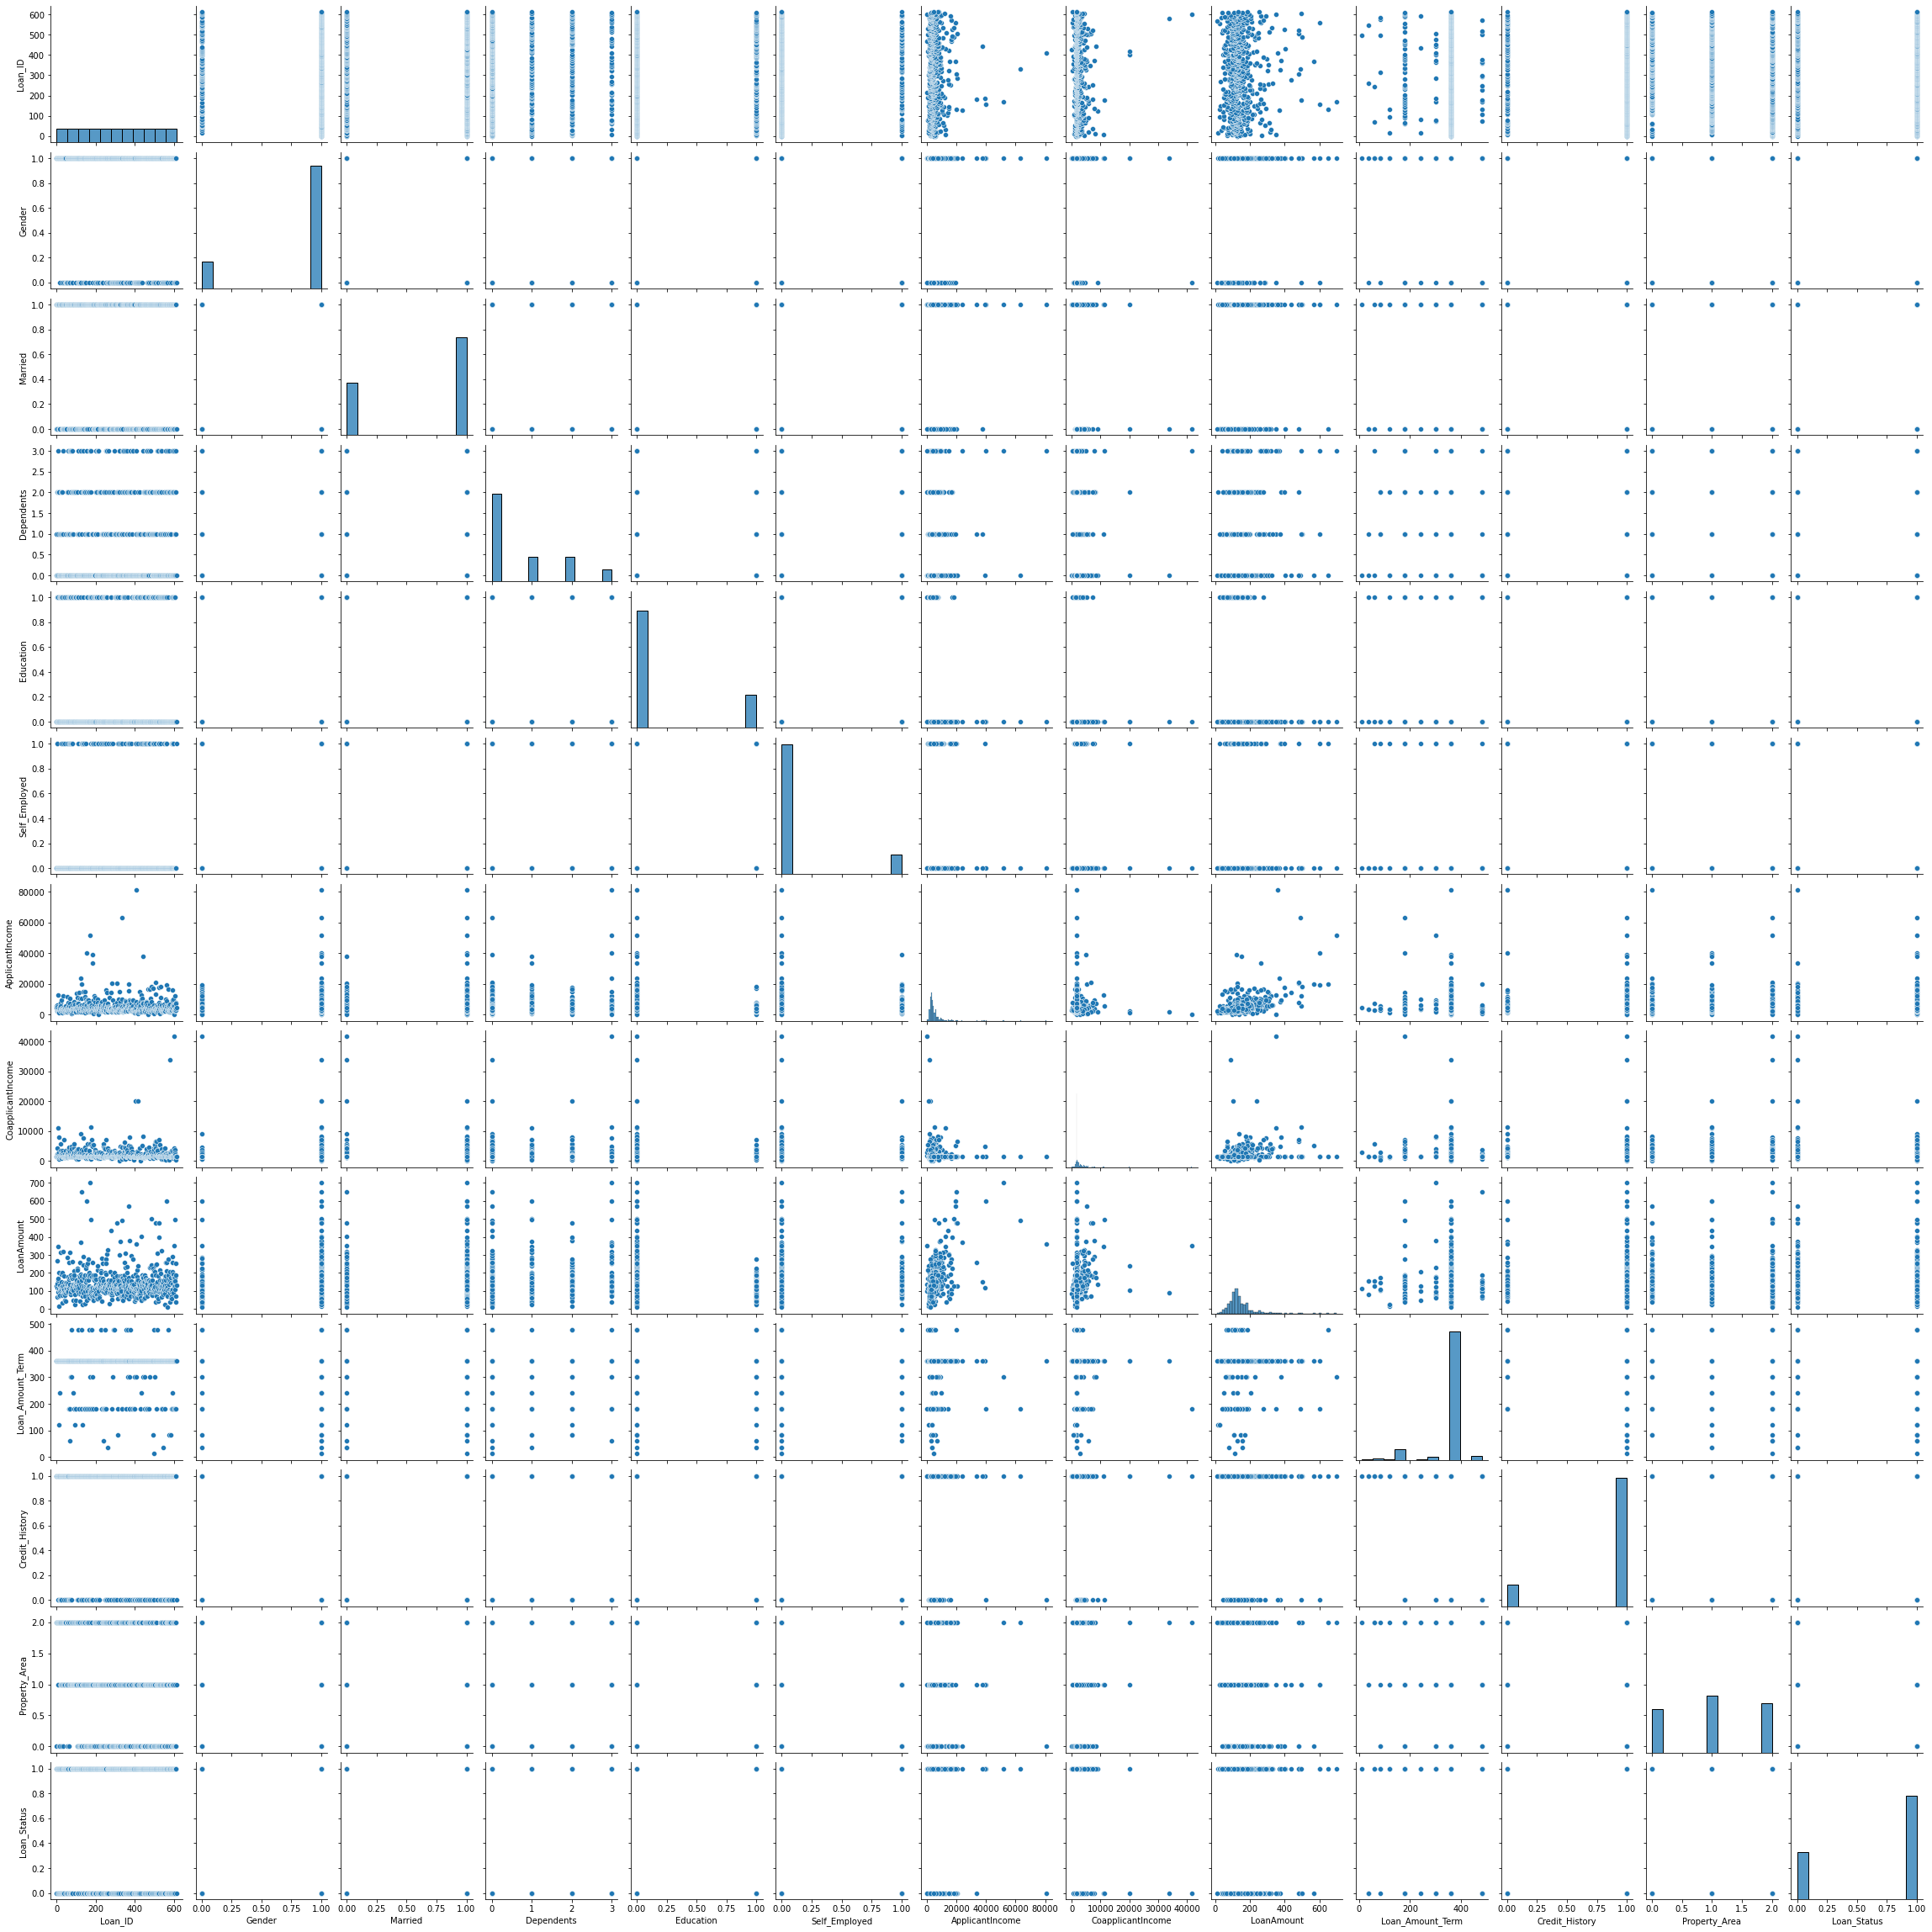

In [20]:
sns.pairplot(df)
plt.show()

### Descriptive Statistics

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Loan_ID,614.0,306.500000,177.390811,0.000000,153.250000,306.500000,459.75,613.0
Gender,614.0,0.817590,0.386497,0.000000,1.000000,1.000000,1.00,1.0
Married,614.0,0.653094,0.476373,0.000000,0.000000,1.000000,1.00,1.0
Dependents,614.0,0.744300,1.009623,0.000000,0.000000,0.000000,1.00,3.0
Education,614.0,0.218241,0.413389,0.000000,0.000000,0.000000,0.00,1.0
Self_Employed,614.0,0.133550,0.340446,0.000000,0.000000,0.000000,0.00,1.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.000000,2877.500000,3812.500000,5795.00,81000.0
CoapplicantIncome,614.0,2342.092871,2621.427966,16.120001,1621.245798,1621.245798,2297.25,41667.0
LoanAmount,614.0,145.752443,84.107233,9.000000,100.250000,128.000000,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.000000,360.000000,360.000000,360.00,480.0


As we can see in the above chart attributes- Loan_Amount_Term,Gender,Married,Credit_History and Loan_Status have more median than their respective mean,which indicates that data might skewed left hand side as well and also the interquartile difference for ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term are varying too much hence there might be possibility that outliers are present in the data set.

##### Note.I'm not going to apply statistical properties over any of the categorical columns.

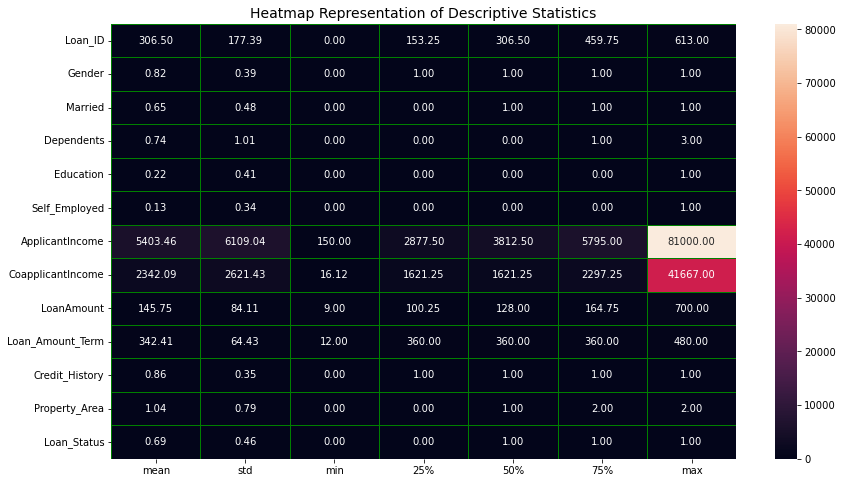

In [28]:
plt.figure(figsize=(14,8))
sns.heatmap(df.describe()[1:].T,annot=True,linecolor='Green',linewidth='1',fmt='0.2f')
plt.title('Heatmap Representation of Descriptive Statistics',fontsize=14)
plt.show()

### Correlation

In [29]:
df.corr().Loan_Status.sort_values()

CoapplicantIncome   -0.089189
Education           -0.085884
LoanAmount          -0.033214
Loan_Amount_Term    -0.022549
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Loan_ID              0.011773
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540556
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

See, there are six attributes having negative values and its showing us that there is negative correlation b/w Income (which is our target variable) and other respective Negative attributes.Hence will remove all the negative correlated columns later in data cleaning phase.Negative correlation means if input is +ve then output is -ve and vice-versa whereas, Positive correlation means if input is +ve then output would also be +ve and vice-versa. Also we'll not remove any categorical columns in this process

##### The attributes those are giving negative correlation are---CoapplicantIncome,Education,LoanAmount,Loan_Amount_Term,ApplicantIncome and Self_Employed where only CoapplicantIncome,LoanAmount,Loan_Amount_Term and Applicant _Income are the numeric variables which i'll drop from the dataframe while rest are either target variable or categorical one hence will not remove any of these negative correlated columns.

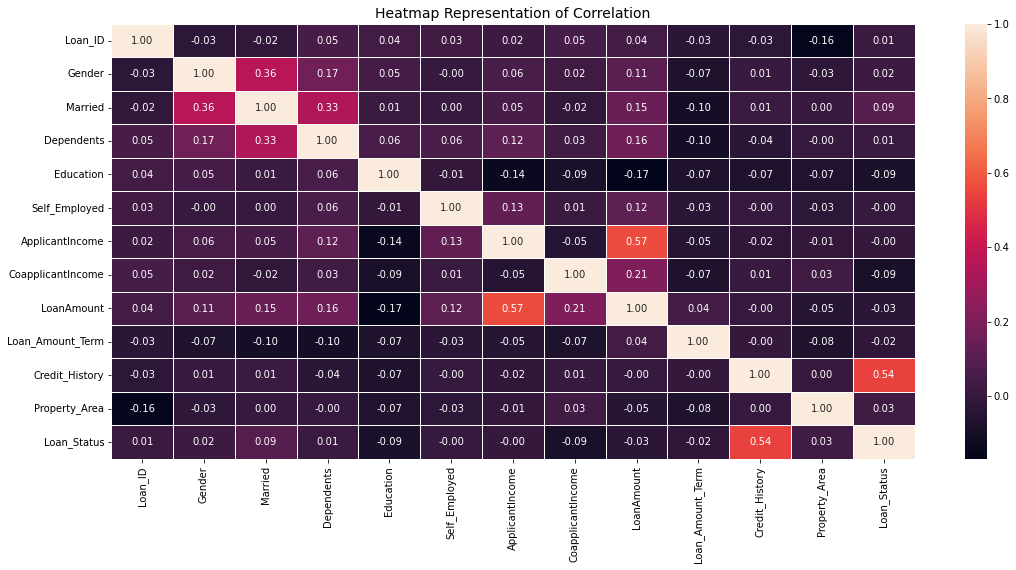

In [30]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidth='1',fmt='0.2f')
plt.title('Heatmap Representation of Correlation',fontsize=14)
plt.show()

### Multicollinearity

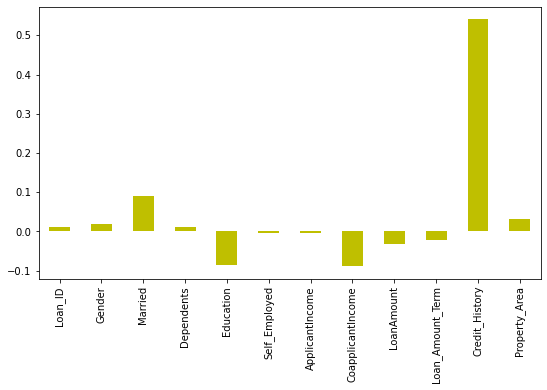

In [35]:
plt.figure(figsize=(9,5))
df.corr().Loan_Status.drop(['Loan_Status']).plot(kind='bar',color='y')
plt.show()

i'll check the multicollinearity later in the Data Cleansing portion when i'll be calculating the Variance inflation factor.

### Skewness

In [36]:
df.skew().sort_values()

Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Gender              -1.648795
Loan_Status         -0.809998
Married             -0.644850
Property_Area       -0.066196
Loan_ID              0.000000
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
LoanAmount           2.743053
ApplicantIncome      6.539513
CoapplicantIncome    9.677699
dtype: float64

The threshold value of Skewness is +/=0.5. Attributes- Property_Area,Loan_ID are only in the range while others are either skewed right or left. will remove skewness from thses columns later on in data cleansing part,also will not touch target column and categorical columns for removing the skewness.

##### Categorical and Target Column = Gender,Married,Property_Area,Loan_ID,Dependents,Education,Self_Employed,Loan_Status

### Distribution Plot
##### Here we can now check the normal distribution pattern for each of the attributes which are skewed left or right hand side

The Distribution Plot for attribute Loan_ID is-
 AxesSubplot(0.125,0.125;0.775x0.755)


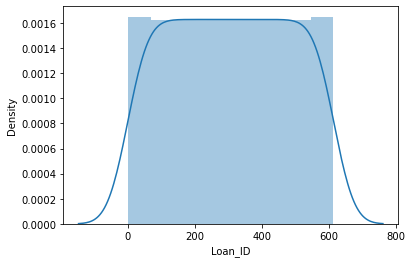



The Distribution Plot for attribute Gender is-
 AxesSubplot(0.125,0.125;0.775x0.755)


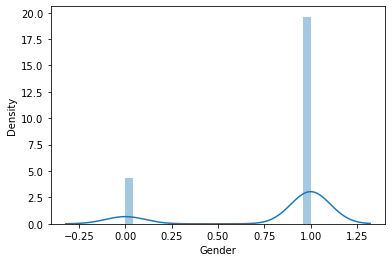



The Distribution Plot for attribute Married is-
 AxesSubplot(0.125,0.125;0.775x0.755)


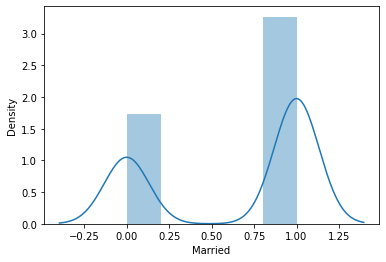



The Distribution Plot for attribute Dependents is-
 AxesSubplot(0.125,0.125;0.775x0.755)


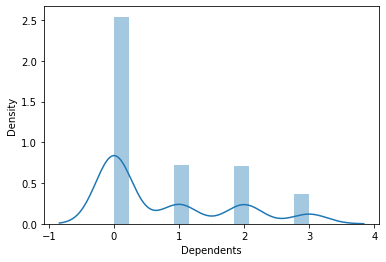



The Distribution Plot for attribute Education is-
 AxesSubplot(0.125,0.125;0.775x0.755)


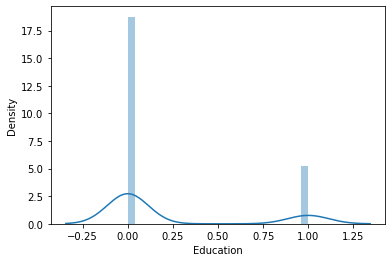



The Distribution Plot for attribute Self_Employed is-
 AxesSubplot(0.125,0.125;0.775x0.755)


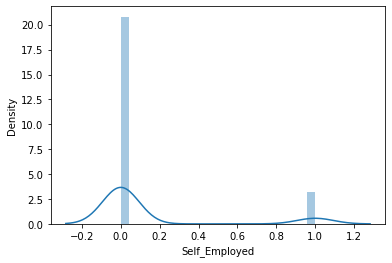



The Distribution Plot for attribute ApplicantIncome is-
 AxesSubplot(0.125,0.125;0.775x0.755)


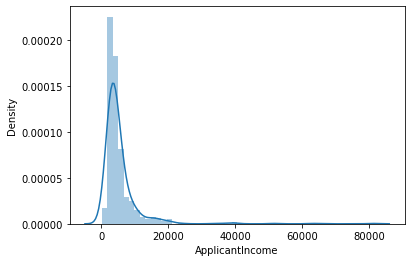



The Distribution Plot for attribute CoapplicantIncome is-
 AxesSubplot(0.125,0.125;0.775x0.755)


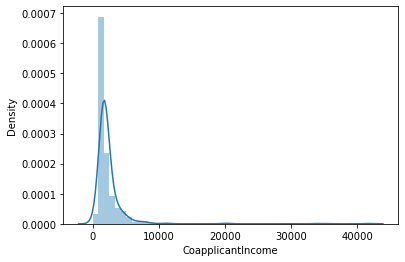



The Distribution Plot for attribute LoanAmount is-
 AxesSubplot(0.125,0.125;0.775x0.755)


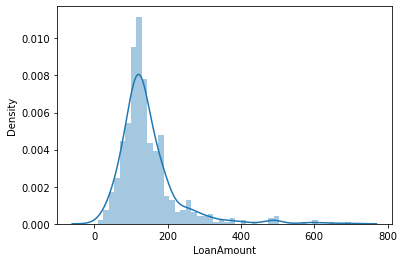



The Distribution Plot for attribute Loan_Amount_Term is-
 AxesSubplot(0.125,0.125;0.775x0.755)


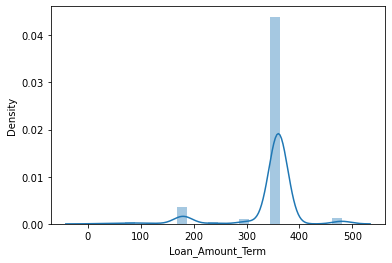



The Distribution Plot for attribute Credit_History is-
 AxesSubplot(0.125,0.125;0.775x0.755)


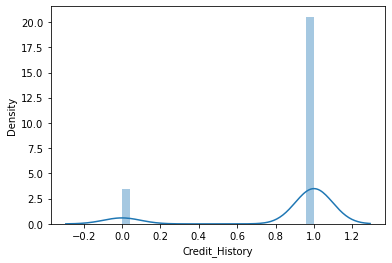



The Distribution Plot for attribute Property_Area is-
 AxesSubplot(0.125,0.125;0.775x0.755)


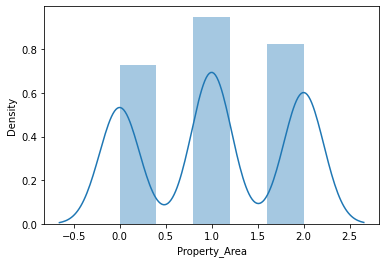



The Distribution Plot for attribute Loan_Status is-
 AxesSubplot(0.125,0.125;0.775x0.755)


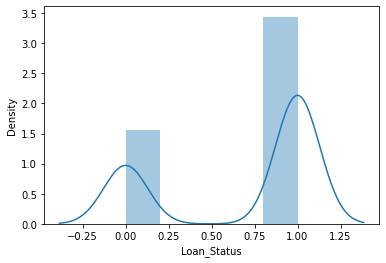

In [37]:
for i in df.columns:
    print(f'The Distribution Plot for attribute {i} is-\n {sns.distplot(df[i])}')
    plt.show()
    print('\n')

As we can see in the above distribution plots all of the attributes are skewed both right ad left hand side.Ergo,i'll remove the skewness later on the data cleansing section by power transfrorm or boxcox method or square_root or log method

### Outliers

In [38]:
z=np.abs(zscore(df))
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([7, 9, 9, 9, 6, 8, 9, 6, 8, 6, 8, 7, 8, 6, 6, 9, 9, 8, 8, 9, 6, 8,
        8, 7, 6, 7, 8, 6, 8, 9, 9, 8, 8, 8, 9, 8, 9, 7, 9, 7, 8],
       dtype=int64))

we can see that there are lots of rows and columns are present having outliers

In [39]:
print(z.iloc[604,8])
print(z.iloc[9,7])
print(z.iloc[94,9])
print(z.iloc[600,7])

4.167692951743534
3.2932204073828855
3.4548579441686273
15.013561442290044


### Boxplots To check the Outliers

The Box-Plot for attribute Loan_ID is-
 AxesSubplot(0.125,0.125;0.775x0.755)


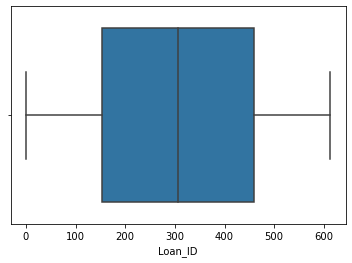



The Box-Plot for attribute Gender is-
 AxesSubplot(0.125,0.125;0.775x0.755)


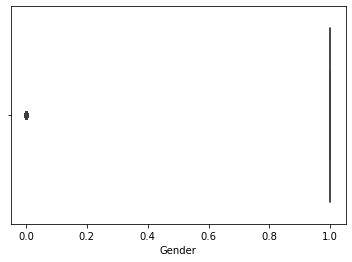



The Box-Plot for attribute Married is-
 AxesSubplot(0.125,0.125;0.775x0.755)


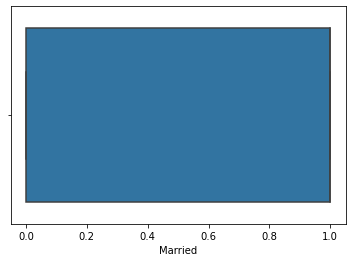



The Box-Plot for attribute Dependents is-
 AxesSubplot(0.125,0.125;0.775x0.755)


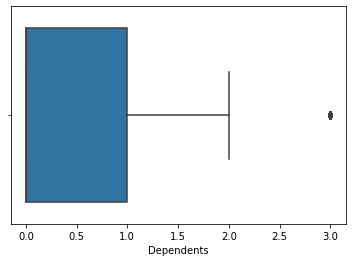



The Box-Plot for attribute Education is-
 AxesSubplot(0.125,0.125;0.775x0.755)


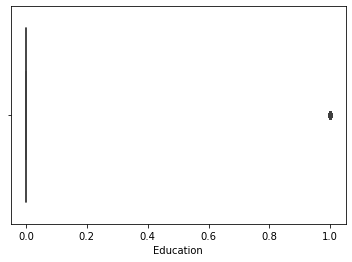



The Box-Plot for attribute Self_Employed is-
 AxesSubplot(0.125,0.125;0.775x0.755)


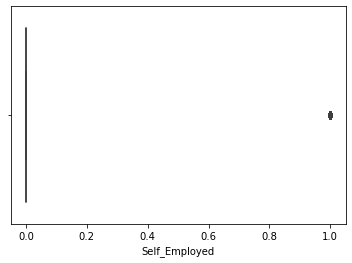



The Box-Plot for attribute ApplicantIncome is-
 AxesSubplot(0.125,0.125;0.775x0.755)


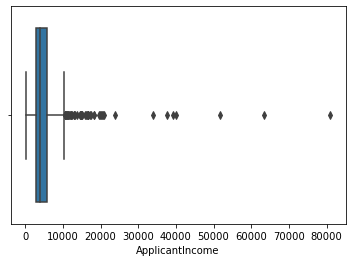



The Box-Plot for attribute CoapplicantIncome is-
 AxesSubplot(0.125,0.125;0.775x0.755)


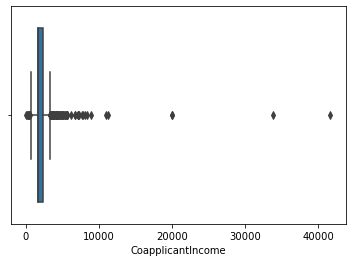



The Box-Plot for attribute LoanAmount is-
 AxesSubplot(0.125,0.125;0.775x0.755)


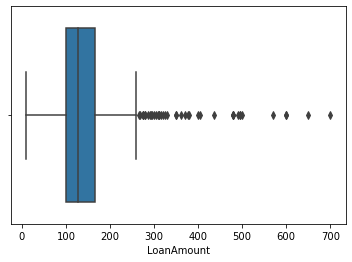



The Box-Plot for attribute Loan_Amount_Term is-
 AxesSubplot(0.125,0.125;0.775x0.755)


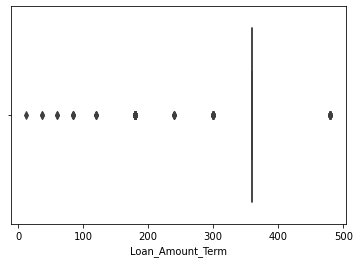



The Box-Plot for attribute Credit_History is-
 AxesSubplot(0.125,0.125;0.775x0.755)


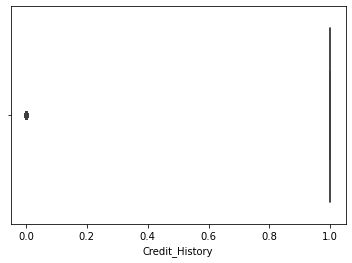



The Box-Plot for attribute Property_Area is-
 AxesSubplot(0.125,0.125;0.775x0.755)


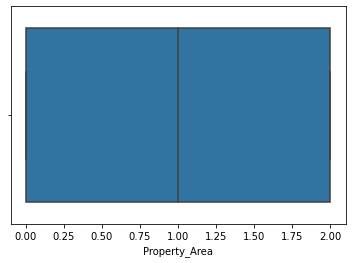



The Box-Plot for attribute Loan_Status is-
 AxesSubplot(0.125,0.125;0.775x0.755)


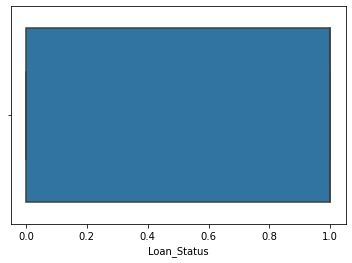

In [40]:
for i in df.columns:
    print(f'The Box-Plot for attribute {i} is-\n {sns.boxplot(df[i])}')
    plt.show()
    print('\n')

As we can see in the above boxplot images there might be possibility of outliers presence in attributes-Gender, Dependents,Education, Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History and I'll remove the same in next part of data cleansing

### Data Cleansing
#### 1. Remove Negative Correlation

In [227]:
#removing negative correlated columns
df1=df.drop(['CoapplicantIncome','LoanAmount','Loan_Amount_Term','ApplicantIncome'],axis=1)
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,1.0,2,1
1,1,1,1,1,0,0,1.0,0,0
2,2,1,1,0,0,1,1.0,2,1
3,3,1,1,0,1,0,1.0,2,1
4,4,1,0,0,0,0,1.0,2,1
...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,1.0,0,1
610,610,1,1,3,0,0,1.0,0,1
611,611,1,1,1,0,0,1.0,2,1
612,612,1,1,2,0,0,1.0,2,1


### 2.Removing Multicollinearity

In [228]:
x=df1.iloc[:,0:-1]
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,0,1,0,0,0,0,1.0,2
1,1,1,1,1,0,0,1.0,0
2,2,1,1,0,0,1,1.0,2
3,3,1,1,0,1,0,1.0,2
4,4,1,0,0,0,0,1.0,2
...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,1.0,0
610,610,1,1,3,0,0,1.0,0
611,611,1,1,1,0,0,1.0,2
612,612,1,1,2,0,0,1.0,2


In [229]:
import statsmodels.api
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [230]:
#calculating variance_inflation_factor Score
def vif():
    df2=pd.DataFrame()
    df2['Features']=x.columns
    df2['variance_inflation_factor']=[variance_inflation_factor(x.values,k) for k in range(x.shape[1])]
    print(df2)

In [231]:
vif()

         Features  variance_inflation_factor
0         Loan_ID                   3.172826
1          Gender                   5.276171
2         Married                   3.589790
3      Dependents                   1.763280
4       Education                   1.269759
5   Self_Employed                   1.151397
6  Credit_History                   4.594337
7   Property_Area                   2.374522


There is multicollinearity exist as we can see that attributes- (Loan_ID,Married) & (Dependents,Education,Self_Employed) are almost having same score but we can't apply it on these categorical variables hence will not drop any columns from the dataframe.

### 3.Removing Outliers

In [232]:
df3=df1[(z<3).all(axis=1)]
df3

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,1.0,2,1
1,1,1,1,1,0,0,1.0,0,0
2,2,1,1,0,0,1,1.0,2,1
3,3,1,1,0,1,0,1.0,2,1
4,4,1,0,0,0,0,1.0,2,1
...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,1.0,0,1
610,610,1,1,3,0,0,1.0,0,1
611,611,1,1,1,0,0,1.0,2,1
612,612,1,1,2,0,0,1.0,2,1


In [233]:
print(df1.shape)
print(df3.shape)

(614, 9)
(577, 9)


In [234]:
percentage_loss=(614-577)*100/614
percentage_loss

6.026058631921824

since the threshold value I'm considering for the outliers is 10% but I'm getting here 6% which is ofcourse good since I've still 577 rows which i think a enough data and it will work good if i even consider the outliers removal,hence will remove the outliers

### 4.Removing Skewness

In [235]:
df3.skew().sort_values()

Credit_History   -1.976043
Gender           -1.622920
Loan_Status      -0.822635
Married          -0.630211
Property_Area    -0.055332
Loan_ID           0.010879
Dependents        1.052106
Education         1.306588
Self_Employed     2.252848
dtype: float64

Since except attribute Credit_History rest are categorical columns hence will remove skewness only in numeric column i.e. in Credit_History only (if the threshold value is greater than +/-0.5)

#### Using np.sqrt method to remove Skewness

In [236]:
df3['Credit_History']=np.sqrt(df3['Credit_History'])
df3['Credit_History']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 577, dtype: float64

In [237]:
df3['Credit_History'].isnull().sum()

0

By doing this process I didn't get any null value and thats a good indication

In [151]:
df3.skew().sort_values()

Gender           -1.622920
Loan_Status      -0.822635
Married          -0.630211
Property_Area    -0.055332
Credit_History    0.000000
Loan_ID           0.010879
Dependents        1.052106
Education         1.306588
Self_Employed     2.252848
dtype: float64

Now as we can see that variable Credit_History is free from skewness

### Using Standard Scaler

In [238]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [239]:
x=df3.iloc[:,0:-1]
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,0,1,0,0,0,0,1.0,2
1,1,1,1,1,0,0,1.0,0
2,2,1,1,0,0,1,1.0,2
3,3,1,1,0,1,0,1.0,2
4,4,1,0,0,0,0,1.0,2
...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,1.0,0
610,610,1,1,3,0,0,1.0,0
611,611,1,1,1,0,0,1.0,2
612,612,1,1,2,0,0,1.0,2


In [240]:
x=sc.fit_transform(x)
x

array([[-1.72210857,  0.47713685, -1.36251079, ..., -0.38058018,
         0.41851254,  1.22747207],
       [-1.71644519,  0.47713685,  0.73393914, ..., -0.38058018,
         0.41851254, -1.30652215],
       [-1.71078181,  0.47713685,  0.73393914, ...,  2.62756724,
         0.41851254,  1.22747207],
       ...,
       [ 1.73821533,  0.47713685,  0.73393914, ..., -0.38058018,
         0.41851254,  1.22747207],
       [ 1.74387871,  0.47713685,  0.73393914, ..., -0.38058018,
         0.41851254,  1.22747207],
       [ 1.74954209, -2.09583477, -1.36251079, ...,  2.62756724,
        -2.38941464, -0.03952504]])

Mean is= -9.62065012673446e-18
Standard_Deviation= 1.0


AxesSubplot(0.125,0.125;0.775x0.755)


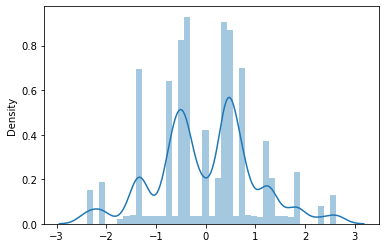

In [241]:
print('Mean is=',x.mean())
print('Standard_Deviation=',x.std())
print('\n')
print(sns.distplot(x))
plt.show()

##### Now,almost our features is normally distributed as we have got the mean almost as zero and standard deviation=1 i.e. data is fully transformed in b/w 0-1

### Using Principle Component Analysis(PCA)

In [244]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
x_pca=pca.fit_transform(x)
x_pca

array([[ 1.19015251, -2.05827393,  0.33414942],
       [-0.75392505, -0.83915176, -0.67964668],
       [-0.18257696, -1.72587216, -0.29870266],
       ...,
       [-0.82911018, -0.15869124, -0.44593247],
       [-1.3584348 , -0.10030269, -0.4006589 ],
       [ 2.31210653,  2.41432881,  0.81225698]])

In [245]:
#Features
x=x_pca
x

array([[ 1.19015251, -2.05827393,  0.33414942],
       [-0.75392505, -0.83915176, -0.67964668],
       [-0.18257696, -1.72587216, -0.29870266],
       ...,
       [-0.82911018, -0.15869124, -0.44593247],
       [-1.3584348 , -0.10030269, -0.4006589 ],
       [ 2.31210653,  2.41432881,  0.81225698]])

In [246]:
#target variable
y=df3['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 577, dtype: int32

### Plotting the Relationship b/w Principle Components

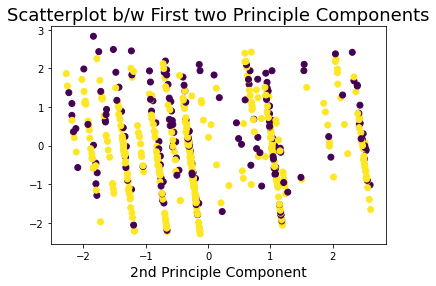

In [247]:
plt.scatter(x[:,0:1],x[:,1:2],c=y)
plt.xlabel('1st Principle Component',fontsize=14)
plt.xlabel('2nd Principle Component',fontsize=14)
plt.title('Scatterplot b/w First two Principle Components',fontsize=18)
plt.show()

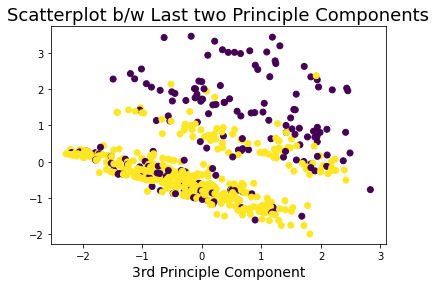

In [248]:
plt.scatter(x[:,1:2],x[:,2:3],c=y)
plt.xlabel('2nd Principle Component',fontsize=14)
plt.xlabel('3rd Principle Component',fontsize=14)
plt.title('Scatterplot b/w Last two Principle Components',fontsize=18)
plt.show()

Above two diagrams tells us that our feature variables are distributed and mixed well that's a good sign going forward

In [249]:
#our Target variable classes needs to be balanced
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

##### 1 indicates that applicant will be approved for the loan amount whereas 0 means applicant will not be approved for the same

### Using IMBlearn Balancing Techniques

In [169]:
!pip install -U imbalanced-learn

In [250]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [251]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

In [252]:
print(x.shape)
print(y.shape)

(796, 3)
(796,)


### Training_Testing Phase
##### I am going to train 80% of the data and testing size would be 20%
#### first will try to find out the best value for random_state

In [253]:
#importing machine learning libraries for Classification model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
lr=LogisticRegression()

In [254]:
#finding out the best random_state 
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    if accuracy_score(pred_train,y_train)==accuracy_score(pred_test,y_test):
        print(f'At random_state-{i} The Logistic Regression Model performs really well')
        print(f'Training accuracy of the model is\t {accuracy_score(pred_train,y_train)}')
        print(f'Testing accuracy of the model is\t {accuracy_score(pred_test,y_test)}')
        print(f'Confusion Matrix for the model is\t {Confusion_matrix(pred_test,y_test)}')
        print(f'Classification Report for the model is\t {classification_report(pred_test,y_test)}')
        print('\n')
    else:
        print(f'At random_state-{i} The Training and Testing Accuracy of the model is different')
        print(f'Training accuracy of the model is\t {accuracy_score(pred_train,y_train)}')
        print(f'Testing accuracy of the model is\t {accuracy_score(pred_test,y_test)}')
        print(f'Confusion Matrix for the model is\n {confusion_matrix(pred_test,y_test)}')
        print(f'Classification Report for the model is\n {classification_report(pred_test,y_test)}')
        print('\n')             

At random_state-0 The Training and Testing Accuracy of the model is different
Training accuracy of the model is	 0.6776729559748428
Testing accuracy of the model is	 0.66875
Confusion Matrix for the model is
 [[43 23]
 [30 64]]
Classification Report for the model is
               precision    recall  f1-score   support

           0       0.59      0.65      0.62        66
           1       0.74      0.68      0.71        94

    accuracy                           0.67       160
   macro avg       0.66      0.67      0.66       160
weighted avg       0.68      0.67      0.67       160



At random_state-1 The Training and Testing Accuracy of the model is different
Training accuracy of the model is	 0.6556603773584906
Testing accuracy of the model is	 0.725
Confusion Matrix for the model is
 [[56 21]
 [23 60]]
Classification Report for the model is
               precision    recall  f1-score   support

           0       0.71      0.73      0.72        77
           1       0.74     

In [255]:
#choosing random_state as 49
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=49)
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
pred_train=lr.predict(x_train)
print(f'At random_state-{i} The Training and Testing Accuracy of the model is almost same')
print(f'Training accuracy of the model is\t {accuracy_score(pred_train,y_train)}')
print(f'Testing accuracy of the model is\t {accuracy_score(pred_test,y_test)}')
print(f'Confusion Matrix for the model is\n {confusion_matrix(pred_test,y_test)}')
print(f'Classification Report for the model is\n {classification_report(pred_test,y_test)}')

At random_state-49 The Training and Testing Accuracy of the model is almost same
Training accuracy of the model is	 0.6792452830188679
Testing accuracy of the model is	 0.66875
Confusion Matrix for the model is
 [[51 21]
 [32 56]]
Classification Report for the model is
               precision    recall  f1-score   support

           0       0.61      0.71      0.66        72
           1       0.73      0.64      0.68        88

    accuracy                           0.67       160
   macro avg       0.67      0.67      0.67       160
weighted avg       0.68      0.67      0.67       160



##### At random_state 49 I'm getting almost equal training and testing accuracy score and equal f1-score too,which indicates model is performing well and now let's try few more models so that we can make a strong prediction going forward

### Finding Out CV Score

In [256]:
from sklearn.model_selection import cross_val_score

In [257]:
for i in range(2,12):
    cvs=cross_val_score(lr,x,y,cv=i)
    mean=cvs.mean()
    std=cvs.std()
    print(f'At K-Fold {i} the CV Score of the logistic model is {mean} and standard deviation is {std}\n')

At K-Fold 2 the CV Score of the logistic model is 0.5615577889447236 and standard deviation is 0.031407035175879394

At K-Fold 3 the CV Score of the logistic model is 0.6281883955170947 and standard deviation is 0.03349149176715321

At K-Fold 4 the CV Score of the logistic model is 0.657035175879397 and standard deviation is 0.025715439058365246

At K-Fold 5 the CV Score of the logistic model is 0.6570597484276729 and standard deviation is 0.044010790557936934

At K-Fold 6 the CV Score of the logistic model is 0.6606952988531936 and standard deviation is 0.03962915546387512

At K-Fold 7 the CV Score of the logistic model is 0.6619757357996761 and standard deviation is 0.03528405720712399

At K-Fold 8 the CV Score of the logistic model is 0.6682702020202019 and standard deviation is 0.040455599599753964

At K-Fold 9 the CV Score of the logistic model is 0.6657587107025309 and standard deviation is 0.03353334430417186

At K-Fold 10 the CV Score of the logistic model is 0.6656170886075949

In [260]:
cvs=cross_val_score(lr,x,y,cv=11)
mean=cvs.mean()
std=cvs.std()
print(f'At K-Fold 11 the CV Score of the logistic model is {mean} and standard deviation is {std}\n')

At K-Fold 11 the CV Score of the logistic model is 0.6670125916701259 and standard deviation is 0.04273599970121219



##### At each K-Fold I'm getting the same CV score which means model is very geniune and behaving well at each stages of training.Now lets try CV score for all other models

In [261]:
#importing other models of classification
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve,roc_auc_score
gb=GaussianNB()
mb=MultinomialNB()
neighbor=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
svm=SVC()
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()
grd=GradientBoostingClassifier()
sgd=SGDClassifier()

In [262]:
#creating a definition to expand the model individually
def model(algorithm,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=18)
    algorithm.fit(x_train,y_train)
    pred_train_x=algorithm.predict(x_train)
    pred_test_y=algorithm.predict(x_test)
    print(f'For model {algorithm}')
    print('Training_Accuracy_Score=',accuracy_score(y_train,pred_train_x))
    print('Testing_Accuracy_Score=',accuracy_score(y_test,pred_test_y))
    print('\n Classification Report-\n',classification_report(y_test,pred_test_y))
    print('\n Confusion Metrix-\n',confusion_matrix(y_test,pred_test_y))
    print('\n\nAUC_ROC CURVE')
    prob=algorithm.predict_proba(x_test)[:,1]
    FPR,TPR,THRESHOLD=roc_curve(y_test,prob)
    plt.plot(FPR,TPR)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC_Curve for the model {algorithm}')
    plt.show()
    ROC_AUC_SCORE=roc_auc_score(y_test,pred_test_y)
    print('ROC AUC SCORE is-',ROC_AUC_SCORE)
    print('\n')
    print('Finding out the best K-Fold Value')
    print('\n\t')
    for l in range(2,8):
        cvscore=cross_val_score(algorithm,x,y,cv=l)
        cv_accuracy_score=cvscore.mean()
        print(f'At the K-Fold {l} the CV score of model {algorithm} is {cv_accuracy_score}')
        print('\n')

For model LogisticRegression()
Training_Accuracy_Score= 0.6871069182389937
Testing_Accuracy_Score= 0.6125

 Classification Report-
               precision    recall  f1-score   support

           0       0.68      0.58      0.63        90
           1       0.55      0.66      0.60        70

    accuracy                           0.61       160
   macro avg       0.62      0.62      0.61       160
weighted avg       0.62      0.61      0.61       160


 Confusion Metrix-
 [[52 38]
 [24 46]]


AUC_ROC CURVE


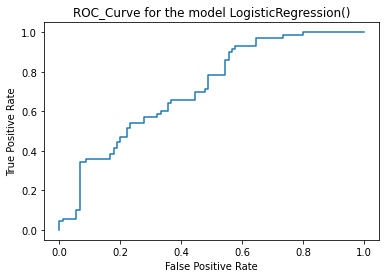

ROC AUC SCORE is- 0.6174603174603174


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model LogisticRegression() is 0.5615577889447236


At the K-Fold 3 the CV score of model LogisticRegression() is 0.6281883955170947


At the K-Fold 4 the CV score of model LogisticRegression() is 0.657035175879397


At the K-Fold 5 the CV score of model LogisticRegression() is 0.6570597484276729


At the K-Fold 6 the CV score of model LogisticRegression() is 0.6606952988531936


At the K-Fold 7 the CV score of model LogisticRegression() is 0.6619757357996761




In [263]:
model(lr,x,y)

For model GaussianNB()
Training_Accuracy_Score= 0.690251572327044
Testing_Accuracy_Score= 0.6125

 Classification Report-
               precision    recall  f1-score   support

           0       0.75      0.47      0.58        90
           1       0.54      0.80      0.64        70

    accuracy                           0.61       160
   macro avg       0.64      0.63      0.61       160
weighted avg       0.66      0.61      0.61       160


 Confusion Metrix-
 [[42 48]
 [14 56]]


AUC_ROC CURVE


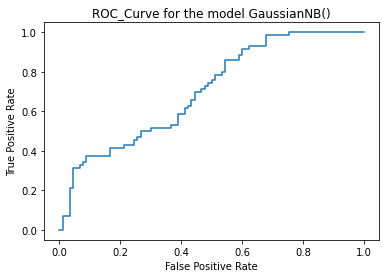

ROC AUC SCORE is- 0.6333333333333334


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GaussianNB() is 0.5452261306532663


At the K-Fold 3 the CV score of model GaussianNB() is 0.5716224523573085


At the K-Fold 4 the CV score of model GaussianNB() is 0.6118090452261307


At the K-Fold 5 the CV score of model GaussianNB() is 0.6281603773584906


At the K-Fold 6 the CV score of model GaussianNB() is 0.6480500493658388


At the K-Fold 7 the CV score of model GaussianNB() is 0.6455297535875086




In [264]:
model(gb,x,y)

For model KNeighborsClassifier()
Training_Accuracy_Score= 0.8286163522012578
Testing_Accuracy_Score= 0.73125

 Classification Report-
               precision    recall  f1-score   support

           0       0.78      0.72      0.75        90
           1       0.68      0.74      0.71        70

    accuracy                           0.73       160
   macro avg       0.73      0.73      0.73       160
weighted avg       0.74      0.73      0.73       160


 Confusion Metrix-
 [[65 25]
 [18 52]]


AUC_ROC CURVE


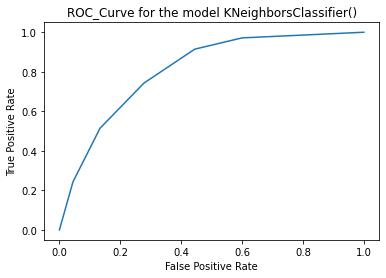

ROC AUC SCORE is- 0.7325396825396825


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model KNeighborsClassifier() is 0.5741206030150754


At the K-Fold 3 the CV score of model KNeighborsClassifier() is 0.6055421572799924


At the K-Fold 4 the CV score of model KNeighborsClassifier() is 0.6206030150753769


At the K-Fold 5 the CV score of model KNeighborsClassifier() is 0.6507704402515723


At the K-Fold 6 the CV score of model KNeighborsClassifier() is 0.6608566871724767


At the K-Fold 7 the CV score of model KNeighborsClassifier() is 0.6821922061791648




In [265]:
model(neighbor,x,y)

For model DecisionTreeClassifier()
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.70625

 Classification Report-
               precision    recall  f1-score   support

           0       0.76      0.70      0.73        90
           1       0.65      0.71      0.68        70

    accuracy                           0.71       160
   macro avg       0.70      0.71      0.70       160
weighted avg       0.71      0.71      0.71       160


 Confusion Metrix-
 [[63 27]
 [20 50]]


AUC_ROC CURVE


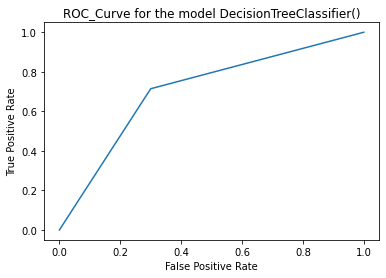

ROC AUC SCORE is- 0.7071428571428571


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model DecisionTreeClassifier() is 0.5590452261306533


At the K-Fold 3 the CV score of model DecisionTreeClassifier() is 0.5980328178937911


At the K-Fold 4 the CV score of model DecisionTreeClassifier() is 0.614321608040201


At the K-Fold 5 the CV score of model DecisionTreeClassifier() is 0.6080424528301887


At the K-Fold 6 the CV score of model DecisionTreeClassifier() is 0.6357085896559581


At the K-Fold 7 the CV score of model DecisionTreeClassifier() is 0.672100605496041




In [266]:
model(dtc,x,y)

For model RandomForestClassifier()
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.75

 Classification Report-
               precision    recall  f1-score   support

           0       0.82      0.71      0.76        90
           1       0.68      0.80      0.74        70

    accuracy                           0.75       160
   macro avg       0.75      0.76      0.75       160
weighted avg       0.76      0.75      0.75       160


 Confusion Metrix-
 [[64 26]
 [14 56]]


AUC_ROC CURVE


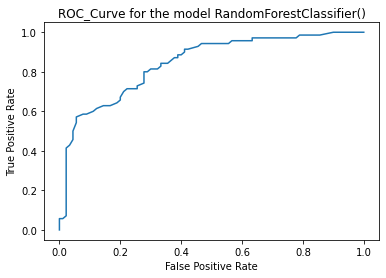

ROC AUC SCORE is- 0.7555555555555555


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model RandomForestClassifier() is 0.5314070351758794


At the K-Fold 3 the CV score of model RandomForestClassifier() is 0.5779637773679481


At the K-Fold 4 the CV score of model RandomForestClassifier() is 0.6017587939698492


At the K-Fold 5 the CV score of model RandomForestClassifier() is 0.6370361635220125


At the K-Fold 6 the CV score of model RandomForestClassifier() is 0.658302954355586


At the K-Fold 7 the CV score of model RandomForestClassifier() is 0.6834453390112448




In [267]:
model(rfc,x,y)

For model AdaBoostClassifier()
Training_Accuracy_Score= 0.7720125786163522
Testing_Accuracy_Score= 0.60625

 Classification Report-
               precision    recall  f1-score   support

           0       0.70      0.53      0.60        90
           1       0.54      0.70      0.61        70

    accuracy                           0.61       160
   macro avg       0.62      0.62      0.61       160
weighted avg       0.63      0.61      0.61       160


 Confusion Metrix-
 [[48 42]
 [21 49]]


AUC_ROC CURVE


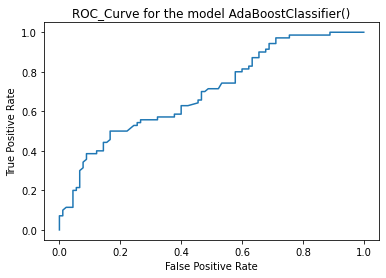

ROC AUC SCORE is- 0.6166666666666667


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model AdaBoostClassifier() is 0.5201005025125628


At the K-Fold 3 the CV score of model AdaBoostClassifier() is 0.5578616352201258


At the K-Fold 4 the CV score of model AdaBoostClassifier() is 0.5778894472361809


At the K-Fold 5 the CV score of model AdaBoostClassifier() is 0.590558176100629


At the K-Fold 6 the CV score of model AdaBoostClassifier() is 0.6155920103288524


At the K-Fold 7 the CV score of model AdaBoostClassifier() is 0.6142901501541465




In [268]:
model(ad,x,y)

For model GradientBoostingClassifier()
Training_Accuracy_Score= 0.9040880503144654
Testing_Accuracy_Score= 0.7

 Classification Report-
               precision    recall  f1-score   support

           0       0.81      0.61      0.70        90
           1       0.62      0.81      0.70        70

    accuracy                           0.70       160
   macro avg       0.71      0.71      0.70       160
weighted avg       0.73      0.70      0.70       160


 Confusion Metrix-
 [[55 35]
 [13 57]]


AUC_ROC CURVE


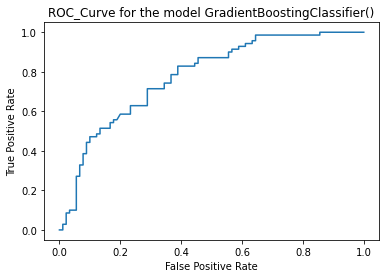

ROC AUC SCORE is- 0.7126984126984127


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GradientBoostingClassifier() is 0.5301507537688441


At the K-Fold 3 the CV score of model GradientBoostingClassifier() is 0.5830094103182484


At the K-Fold 4 the CV score of model GradientBoostingClassifier() is 0.5891959798994975


At the K-Fold 5 the CV score of model GradientBoostingClassifier() is 0.6156210691823898


At the K-Fold 6 the CV score of model GradientBoostingClassifier() is 0.6394774815827448


At the K-Fold 7 the CV score of model GradientBoostingClassifier() is 0.6432563710160356




In [269]:
model(grd,x,y)

### Hyper Parameter Tuning
#### To make the model more accurate by providing their best parameters

In [270]:
from sklearn.model_selection import GridSearchCV

In [271]:
#defining all the parameters of the respective models
Parameter_neighbor={'weights':['uniform', 'distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
Parameter_dtc={'criterion':["gini", "entropy", "log_loss"],'splitter':["best", "random"],'max_features':["auto", "sqrt", "log2"]}
Parameter_rfc={'criterion' : ["gini", "entropy", "log_loss"],'max_features':["sqrt", "log2", None],'class_weight':["balanced", "balanced_subsample"]}
Parameter_ad={'algorithm':['SAMME', 'SAMME.R']}
Parameter_grd={'loss':['log_loss', 'deviance', 'exponential'],'criterion':['friedman_mse', 'squared_error', 'mse'],'max_features':['auto', 'sqrt', 'log2']}

In [272]:
#Now I'm defining a function so that i can individuallay let the model perfom and give the best parameter out of it.
def HPT(machine,dictionary):
    gd=GridSearchCV(machine,dictionary)
    gd.fit(x,y)
    print(f'The best Parameters of the model {machine} is {gd.best_params_}')

In [273]:
HPT(neighbor,Parameter_neighbor)

The best Parameters of the model KNeighborsClassifier() is {'algorithm': 'auto', 'weights': 'uniform'}


In [274]:
HPT(dtc,Parameter_dtc)

The best Parameters of the model DecisionTreeClassifier() is {'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'random'}


In [275]:
HPT(rfc,Parameter_rfc)

The best Parameters of the model RandomForestClassifier() is {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt'}


In [276]:
HPT(ad,Parameter_ad)

The best Parameters of the model AdaBoostClassifier() is {'algorithm': 'SAMME'}


In [277]:
HPT(grd,Parameter_grd)

The best Parameters of the model GradientBoostingClassifier() is {'criterion': 'squared_error', 'loss': 'exponential', 'max_features': 'sqrt'}


In [278]:
#Redefining the models after getting the parameters
lr=LogisticRegression()
gb=GaussianNB()
neighbor=KNeighborsClassifier(algorithm='auto',weights='uniform')
dtc=DecisionTreeClassifier(criterion='entropy',max_features='auto',splitter='random')
rfc=RandomForestClassifier(class_weight= 'balanced',criterion='entropy',max_features='sqrt')
ad=AdaBoostClassifier(algorithm= 'SAMME')
grd=GradientBoostingClassifier(criterion='squared_error',loss= 'exponential',max_features= 'sqrt')

For model LogisticRegression()
Training_Accuracy_Score= 0.6871069182389937
Testing_Accuracy_Score= 0.6125

 Classification Report-
               precision    recall  f1-score   support

           0       0.68      0.58      0.63        90
           1       0.55      0.66      0.60        70

    accuracy                           0.61       160
   macro avg       0.62      0.62      0.61       160
weighted avg       0.62      0.61      0.61       160


 Confusion Metrix-
 [[52 38]
 [24 46]]


AUC_ROC CURVE


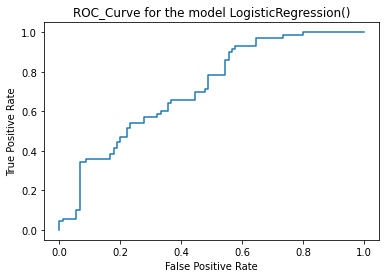

ROC AUC SCORE is- 0.6174603174603174


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model LogisticRegression() is 0.5615577889447236


At the K-Fold 3 the CV score of model LogisticRegression() is 0.6281883955170947


At the K-Fold 4 the CV score of model LogisticRegression() is 0.657035175879397


At the K-Fold 5 the CV score of model LogisticRegression() is 0.6570597484276729


At the K-Fold 6 the CV score of model LogisticRegression() is 0.6606952988531936


At the K-Fold 7 the CV score of model LogisticRegression() is 0.6619757357996761




In [279]:
model(lr,x,y)

For model GaussianNB()
Training_Accuracy_Score= 0.690251572327044
Testing_Accuracy_Score= 0.6125

 Classification Report-
               precision    recall  f1-score   support

           0       0.75      0.47      0.58        90
           1       0.54      0.80      0.64        70

    accuracy                           0.61       160
   macro avg       0.64      0.63      0.61       160
weighted avg       0.66      0.61      0.61       160


 Confusion Metrix-
 [[42 48]
 [14 56]]


AUC_ROC CURVE


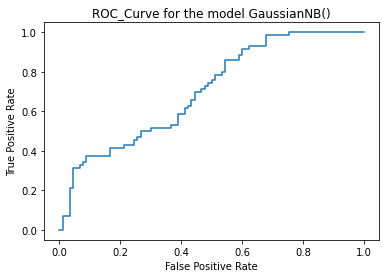

ROC AUC SCORE is- 0.6333333333333334


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GaussianNB() is 0.5452261306532663


At the K-Fold 3 the CV score of model GaussianNB() is 0.5716224523573085


At the K-Fold 4 the CV score of model GaussianNB() is 0.6118090452261307


At the K-Fold 5 the CV score of model GaussianNB() is 0.6281603773584906


At the K-Fold 6 the CV score of model GaussianNB() is 0.6480500493658388


At the K-Fold 7 the CV score of model GaussianNB() is 0.6455297535875086




In [280]:
model(gb,x,y)

For model KNeighborsClassifier()
Training_Accuracy_Score= 0.8286163522012578
Testing_Accuracy_Score= 0.73125

 Classification Report-
               precision    recall  f1-score   support

           0       0.78      0.72      0.75        90
           1       0.68      0.74      0.71        70

    accuracy                           0.73       160
   macro avg       0.73      0.73      0.73       160
weighted avg       0.74      0.73      0.73       160


 Confusion Metrix-
 [[65 25]
 [18 52]]


AUC_ROC CURVE


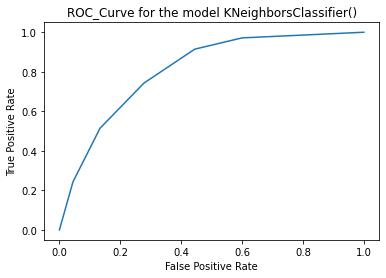

ROC AUC SCORE is- 0.7325396825396825


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model KNeighborsClassifier() is 0.5741206030150754


At the K-Fold 3 the CV score of model KNeighborsClassifier() is 0.6055421572799924


At the K-Fold 4 the CV score of model KNeighborsClassifier() is 0.6206030150753769


At the K-Fold 5 the CV score of model KNeighborsClassifier() is 0.6507704402515723


At the K-Fold 6 the CV score of model KNeighborsClassifier() is 0.6608566871724767


At the K-Fold 7 the CV score of model KNeighborsClassifier() is 0.6821922061791648




In [281]:
model(neighbor,x,y)

For model DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       splitter='random')
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.75625

 Classification Report-
               precision    recall  f1-score   support

           0       0.80      0.76      0.78        90
           1       0.71      0.76      0.73        70

    accuracy                           0.76       160
   macro avg       0.75      0.76      0.75       160
weighted avg       0.76      0.76      0.76       160


 Confusion Metrix-
 [[68 22]
 [17 53]]


AUC_ROC CURVE


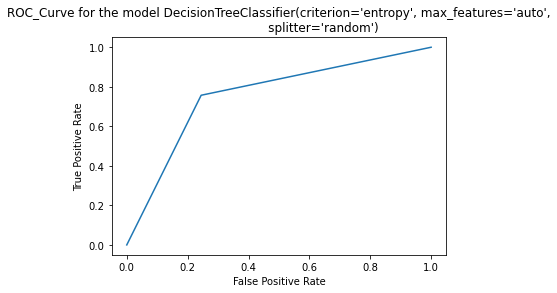

ROC AUC SCORE is- 0.7563492063492063


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       splitter='random') is 0.5314070351758794


At the K-Fold 3 the CV score of model DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       splitter='random') is 0.5565564855535065


At the K-Fold 4 the CV score of model DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       splitter='random') is 0.6193467336683417


At the K-Fold 5 the CV score of model DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       splitter='random') is 0.5955581761006289


At the K-Fold 6 the CV score of model DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       splitter='random') is 0.5967570441254653


At the K-Fold 7 the CV score of model DecisionTreeClassifier(criterion='entropy

In [282]:
model(dtc,x,y)

For model RandomForestClassifier(class_weight='balanced', criterion='entropy')
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.73125

 Classification Report-
               precision    recall  f1-score   support

           0       0.81      0.69      0.74        90
           1       0.66      0.79      0.72        70

    accuracy                           0.73       160
   macro avg       0.73      0.74      0.73       160
weighted avg       0.74      0.73      0.73       160


 Confusion Metrix-
 [[62 28]
 [15 55]]


AUC_ROC CURVE


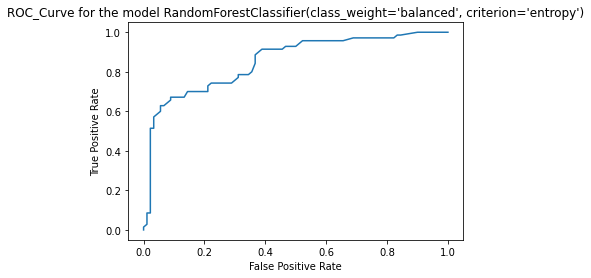

ROC AUC SCORE is- 0.7373015873015872


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model RandomForestClassifier(class_weight='balanced', criterion='entropy') is 0.528894472361809


At the K-Fold 3 the CV score of model RandomForestClassifier(class_weight='balanced', criterion='entropy') is 0.5704118787534874


At the K-Fold 4 the CV score of model RandomForestClassifier(class_weight='balanced', criterion='entropy') is 0.6293969849246231


At the K-Fold 5 the CV score of model RandomForestClassifier(class_weight='balanced', criterion='entropy') is 0.6332154088050314


At the K-Fold 6 the CV score of model RandomForestClassifier(class_weight='balanced', criterion='entropy') is 0.6482019442545758


At the K-Fold 7 the CV score of model RandomForestClassifier(class_weight='balanced', criterion='entropy') is 0.6733315589859605




In [283]:
model(rfc,x,y)

For model AdaBoostClassifier(algorithm='SAMME')
Training_Accuracy_Score= 0.7311320754716981
Testing_Accuracy_Score= 0.63125

 Classification Report-
               precision    recall  f1-score   support

           0       0.73      0.54      0.62        90
           1       0.56      0.74      0.64        70

    accuracy                           0.63       160
   macro avg       0.65      0.64      0.63       160
weighted avg       0.66      0.63      0.63       160


 Confusion Metrix-
 [[49 41]
 [18 52]]


AUC_ROC CURVE


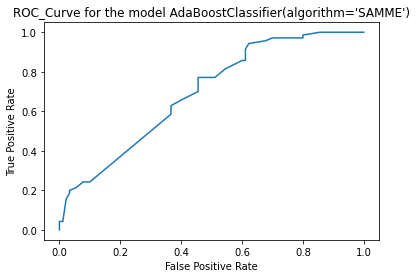

ROC AUC SCORE is- 0.6436507936507937


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.5238693467336684


At the K-Fold 3 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.5904998344918901


At the K-Fold 4 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.6067839195979899


At the K-Fold 5 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.6206761006289307


At the K-Fold 6 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.6331358699779753


At the K-Fold 7 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.6167853261472265




In [284]:
model(ad,x,y)

For model GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                           max_features='sqrt')
Training_Accuracy_Score= 0.860062893081761
Testing_Accuracy_Score= 0.6875

 Classification Report-
               precision    recall  f1-score   support

           0       0.78      0.62      0.69        90
           1       0.61      0.77      0.68        70

    accuracy                           0.69       160
   macro avg       0.70      0.70      0.69       160
weighted avg       0.71      0.69      0.69       160


 Confusion Metrix-
 [[56 34]
 [16 54]]


AUC_ROC CURVE


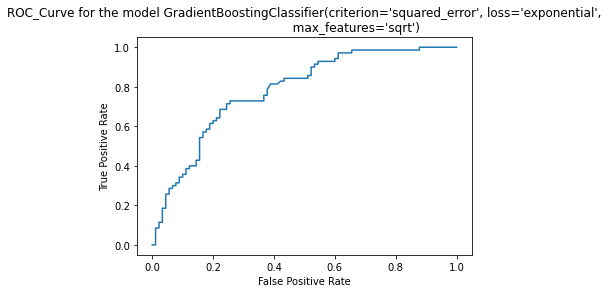

ROC AUC SCORE is- 0.6968253968253968


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                           max_features='sqrt') is 0.5263819095477387


At the K-Fold 3 the CV score of model GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                           max_features='sqrt') is 0.5603537144748664


At the K-Fold 4 the CV score of model GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                           max_features='sqrt') is 0.6206030150753769


At the K-Fold 5 the CV score of model GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                           max_features='sqrt') is 0.633254716981132


At the K-Fold 6 the CV score of model GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                           max_features='sqrt') is 0.6545530492898913


At th

In [285]:
model(grd,x,y)

##### DecisionTreeClassifier model seems perfect as compare to other models as the training accuracy is almost 100% while testing accuracy and CV score is 76% which is good enough.Also the CV score and testing accuracy are same it's also indicates that our model is performing excellent by each method either random_state or K-Fold method.The F1-score is 76% too it means that error are on lower side and ROC_AUC_SCORE is 0.76,which is greater than the threshold value of 0.6, which indicates that the machine probability is good while predicting 1 as 1 and 0 as 0.

### Saving the Best Model

In [286]:
import joblib

In [287]:
file='loan_status.obj'
joblib.dump(dtc,file)

['loan_status.obj']

### Loading the Modle

In [288]:
a=joblib.load('loan_status.obj')
a

DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       splitter='random')

In [289]:
#making prediction
pred=a.predict(x_test)
pred

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1])

In [290]:
#Testing Accuracy of DecisionTreeClassifier Model
Accuracy_score=(accuracy_score(pred,y_test))*100
Accuracy_score

95.625

### Plotting ROC_AUC_CURVE


The ROC AUC Score is= 0.9564230949773118


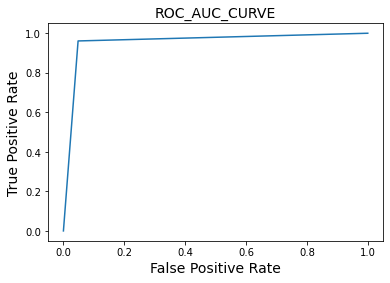

In [293]:
prob=a.predict_proba(x_test)[:,1]
FPR,TPR,THRESHOLD=roc_curve(y_test,prob)
plt.plot(FPR,TPR)
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC_AUC_CURVE',fontsize=14)
print(f'\nThe ROC AUC Score is= {roc_auc_score(y_test,pred)}')

### Conclusion

In [292]:
conclusion=pd.DataFrame(data=([pred,y_test]),index=['Predicted Loan_Status','Original Loan_Status'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
Predicted Loan_Status,1,1,1,0,0,0,1,1,0,0,...,0,1,0,0,0,0,1,0,0,1
Original Loan_Status,1,1,1,0,0,0,1,1,0,0,...,0,1,0,0,0,0,1,1,0,1


#### When I deployed our DecisionTreeClassifier Model to the y_test data what i found is that the testing accuracy of the model went to almost 96% which is excellent accuracy for predicting any target variable correctly.Also the ROC AUC Score is 0.96 which is greater than 0.6 of threshold value and it indicates that out of 100 times,96 times model is predicting the right classes i.e. 1 as 1 and 0 as 0 and this is still a great accuracy. As we can see in the conclusion portion we have got almost same value in predicted Loan_Status as compare to original Loan_Status. So we can say that this model has great accuracy while predicting the Loan_Status of the applicants